# Analysis of Tech Company Salaries

![techCompanies](shutterstock_2241902509.jpg) 

### This notebook takes a look into a dataset populated with information on tech employees working at various companies.  Our mission is to find and measure variables that may have an impact on the salary of an individual.

In [4]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
# Load the dataset
df = pd.read_csv('tech_companies_salary.csv')

In [6]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
# Number of null values in each column
df.isna().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

# Drop data with null values

Dropping the data of the gender, education, company, race, tag, and level columns, cleans up the data in order to look at the relationship of these variables on salaries.  These values cannot be replaced without potentially skewing the data.

In [8]:
# Remove rows with null values in subset columns
df = df.dropna(subset=['gender', 'Education', 'company', 'Race', 'tag', 'level'])
# Verify removal
print(df.isna().sum())

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64


## Updated Summary Statistics

In [9]:
df.size

623935

In [10]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,2.151500e+04,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000,21515.000000
mean,1.979508e+05,7.127167,2.706995,133894.538694,44974.392424,18401.301418,10177.354218,561.242436,59207.188891,0.421055,0.506577,0.042854,0.013944,0.015710,0.528887,0.355612,0.035417,0.030769,0.049361
std,1.331313e+05,5.848876,3.328438,57231.645682,72523.732291,24802.564405,7677.552448,315.744730,14561.633489,0.493740,0.499968,0.202532,0.117260,0.124354,0.499176,0.478710,0.184836,0.172696,0.216625
min,1.000000e+04,0.000000,0.000000,4000.000000,0.000000,0.000000,10.000000,0.000000,21208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.190000e+05,3.000000,0.000000,100000.000000,0.000000,3000.000000,7322.000000,501.000000,47070.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.740000e+05,6.000000,2.000000,135000.000000,20000.000000,13000.000000,8198.000000,751.000000,59849.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.450000e+05,10.000000,4.000000,165000.000000,55000.000000,25000.000000,11521.000000,807.000000,71599.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.980000e+06,45.000000,40.000000,900000.000000,954000.000000,900000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Subsetting dataframe to remove redundant columns

In [11]:
df = df[['totalyearlycompensation', 'basesalary', 'bonus', 'company', 'cityid', 'location', 'level', 'title', 'tag', 'yearsofexperience',
        'yearsatcompany', 'stockgrantvalue', 'dmaid', 'rowNumber', 'Race', 'Education', 'gender']]

## Method to split the location column into city and state columns.

Locations with more than 2 strings delimited by a comma will be set to null values.  These locations correspond to locations outside of the United States.

Limiting our scope of the data to within the U.S. will increase the accuracy and usefulness of our model, as well as eliminate some outliers in the data.

In [12]:
def split_location(loc):
    location = loc.split(', ')  
    if len(location) == 2:
        city = location[0]
        state = location[1]
    else:
        city = None
        state = None
    return pd.Series([city, state])

df[['City', 'State']] = df['location'].apply(split_location)

### Verifying results of creating new columns and dropping data with null values in state column.

Dropping these results further eliminates international entries.

In [13]:
df.State.unique()

array(['CA', 'WA', 'TX', None, 'AZ', 'NY', 'IL', 'MA', 'NC', 'VA', 'CO',
       'FL', 'WI', 'DC', 'OR', 'MI', 'MN', 'MO', 'PA', 'UT', 'NJ', 'TN',
       'LA', 'GA', 'AR', 'IA', 'OH', 'MD', 'IN', 'MT', 'RI', 'DE', 'OK',
       'NV', 'CT', 'AL', 'SC', 'KS', 'KY', 'WV', 'MS', 'ID', 'NE', 'HI',
       'NH', 'NM', 'ND', 'VT', 'WY', 'ME'], dtype=object)

In [14]:
# Remove rows with null values in State column
df = df.dropna(subset='State')
# Verify removal
print(df.isna().sum())

totalyearlycompensation    0
basesalary                 0
bonus                      0
company                    0
cityid                     0
location                   0
level                      0
title                      0
tag                        0
yearsofexperience          0
yearsatcompany             0
stockgrantvalue            0
dmaid                      0
rowNumber                  0
Race                       0
Education                  0
gender                     0
City                       0
State                      0
dtype: int64


### Verification that columns contain unique and non-redundant values

In [15]:
df.Education.unique()

array(['PhD', "Bachelor's Degree", "Master's Degree", 'Some College',
       'Highschool'], dtype=object)

In [16]:
df.Race.unique()

array(['Asian', 'Two Or More', 'White', 'Hispanic', 'Black'], dtype=object)

In [17]:
df.title.unique()

array(['Software Engineer', 'Software Engineering Manager',
       'Hardware Engineer', 'Product Designer', 'Management Consultant',
       'Product Manager', 'Solution Architect', 'Sales',
       'Technical Program Manager', 'Data Scientist', 'Recruiter',
       'Mechanical Engineer', 'Business Analyst', 'Human Resources',
       'Marketing'], dtype=object)

### Formatting of the company category eliminates redundant values

In [18]:
df['company'] = df['company'].apply(lambda company: company.upper())

### Exporting dataframe for external use and backup purposes

In [19]:
#df.to_csv('updated_base_df.csv')

### Importing CSV loaded with stock market information to merge with original dataframe.

In [20]:
stocks_df = pd.read_csv('screener-stocks.csv')
stocks_df.head()

,Symbol,Company Name,Market Cap,Stock Price,% Change,Industry,PE Ratio,Ent. Value,MC Group,Sector,...,Oper. Margin,Pretax Margin,Profit Margin,R&D / Rev,Avg. Volume,Rel. Volume,RSI,Tax / Revenue,Rev Gr. This Q,Rev Gr. Next Q
0,FLWS,1-800-FLOWERS.COM,6.965698e+08,10.92,1.11%,Specialty Retail,NaN,7.024748e+08,Small-Cap,Consumer Discretionary,...,-2.89%,-3.39%,-3.24%,3.20%,420598.0,77.96%,59.81,-0.15%,-5.95%,-3.19%
1,VCXB,10X Capital Venture Acquisition Corp. III,1.421026e+08,10.77,NaN,Shell Companies,63.35,1.420773e+08,Micro-Cap,Financials,...,NaN,NaN,NaN,NaN,10038.0,0.12%,60.96,NaN,NaN,NaN
2,TXG,10x Genomics,4.316825e+09,36.89,1.77%,Health Information Services,NaN,4.023500e+09,Mid-Cap,Healthcare,...,-42.88%,-40.21%,-41.23%,43.69%,1403080.0,74.62%,34.24,1.02%,7.41%,8.17%
3,YI,"111, Inc.",8.735293e+07,1.01,-2.88%,Pharmaceutical Retailers,NaN,3.884045e+07,Micro-Cap,Healthcare,...,-2.30%,-2.58%,-2.63%,0.82%,81508.0,102.12%,27.80,0.00%,NaN,NaN
4,YQ,17 Education & Technology Group,3.065829e+07,2.97,NaN,Education & Training Services,NaN,-3.290321e+07,Nano-Cap,Consumer Staples,...,-196.68%,-178.90%,-182.37%,96.36%,18790.0,16.56%,54.54,NaN,NaN,NaN


### Creating a company column with reformatted company names creates a column that can merge the datasets.

Removal of the reference to ticker GOOGL, in order to merge data corresponding to ticker GOOG.

In [21]:
stocks_df['company'] = stocks_df['Company Name'].apply(lambda company: company.upper())
stocks_df.drop(stocks_df.loc[stocks_df['Symbol']=='GOOGL'].index, inplace=True)

### Reassignment of company names in original dataset to corresponding company names in stock dataset.

In [22]:
df.loc[ df['company'] == 'GOOGLE', 'company'] = 'ALPHABET'
df.loc[ df['company'] == 'AMAZON', 'company'] = 'AMAZON.COM'
df.loc[ df['company'] == 'FACEBOOK', 'company'] = 'META PLATFORMS'
df.loc[ df['company'] == 'PAYPAL', 'company'] = 'PAYPAL HOLDINGS'
df.loc[ df['company'] == 'HSBC', 'company'] = 'HSBC HOLDINGS'
df.loc[ df['company'] == 'APPLE INC.', 'company'] = 'APPLE'
df.loc[ df['company'] == '2U', 'company'] = '2U, INC.'
df.loc[ df['company'] == 'ABBOTT', 'company'] = 'ABBOTT LABORATORIES'
df.loc[ df['company'] == '8X8', 'company'] = '8X8, INC.'
df.loc[ df['company'] == 'ADP', 'company'] = 'Automatic Data Processing'.upper()
df.loc[ df['company'] == 'AFFIRM', 'company'] = 'AFFIRM HOLDINGS'
df.loc[ df['company'] == 'AMD', 'company'] = 'ADVANCED MICRO DEVICES'
df.loc[ df['company'] == 'INTEL CORPORATION', 'company'] = 'INTEL'
df.loc[ df['company'] == 'IBM', 'company'] = 'INTERNATIONAL BUSINESS MACHINES'
df.loc[ df['company'] == 'CAPITAL ONE', 'company'] = 'CAPITAL ONE FINANCIAL'
df.loc[ df['company'] == 'CISCO', 'company'] = 'CISCO SYSTEMS'
df.loc[ df['company'] == 'JPMORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'UBER', 'company'] = 'UBER TECHNOLOGIES'
df.loc[ df['company'] == 'GOLDMAN SACHS', 'company'] = 'THE GOLDMAN SACHS GROUP'
df.loc[ df['company'] == 'WALMART LABS', 'company'] = 'WALMART'
df.loc[ df['company'] == 'EBAY', 'company'] = 'EBAY INC.'
df.loc[ df['company'] == 'VISA', 'company'] = 'VISA INC.'
df.loc[ df['company'] == 'LYFT', 'company'] = 'LYFT, INC.'
df.loc[ df['company'] == 'SAP', 'company'] = 'SAP SE'
df.loc[ df['company'] == 'DELL', 'company'] = 'DELL TECHNOLOGIES'
df.loc[ df['company'] == 'BOEING', 'company'] = 'THE BOEING COMPANY'
df.loc[ df['company'] == 'GENERAL MOTORS', 'company'] = 'GENERAL MOTORS COMPANY'
df.loc[ df['company'] == 'T-MOBILE', 'company'] = 'T-MOBILE US'

### Initial merge of the data sets

In [23]:
agg_df = pd.merge(df, stocks_df, on="company", how="left")
print(agg_df['Symbol'].isna().sum())

5093


In [24]:
counts = agg_df['company'].value_counts()
print(counts.head(10))

company
AMAZON.COM                         2090
MICROSOFT                          1299
ALPHABET                           1104
META PLATFORMS                      867
APPLE                               569
ORACLE                              309
INTEL                               303
INTERNATIONAL BUSINESS MACHINES     277
CAPITAL ONE FINANCIAL               267
CISCO SYSTEMS                       262
Name: count, dtype: int64


### Eliminating Remaining Null Values

To eliminate the remaining null values of the symbol column, the entries were researched and a symbol was manually entered into the dataset. Private companies were assigned "Private", while ambiguous and government companies were left null.  The latter to be dropped.

This dataset was then merged on the "Symbol" column to fill in missing values and the dataset was saved as final_aggregated_df.csv.

Column names were updated in order to follow a uniform naming convention.

# Import of aggregated dataset

In [25]:
df = pd.read_csv('final_aggregated_df.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,total_yearly_compensation,base_salary,bonus,company,city_id,location,state,city,...,pretax_margin,profit_margin,research_development_over_revenue,average_volume,relative_volume,rsi,tax_over_revenue,revenue_growth_this_quarter,revenue_growth_next_quarter,sex
0,5928,0,400000,210000,45000,ALPHABET,7472,"Sunnyvale, CA",CA,Sunnyvale,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
1,10063,1,136000,124000,11000,MICROSOFT,11521,"Redmond, WA",WA,Redmond,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
2,5929,2,337000,177000,36000,ALPHABET,7413,"San Bruno, CA",CA,San Bruno,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
3,10064,3,222000,164000,20000,MICROSOFT,11527,"Seattle, WA",WA,Seattle,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
4,3787,4,187000,165000,0,BLEND,7419,"San Francisco, CA",CA,San Francisco,...,-113.87%,-118.15%,52.02%,1863929.0,43.24%,56.52,0.06%,-5.65%,-0.47%,Male


In [26]:
df.shape

(16903, 92)

# Subsetting and Cleaning Workable Dataset

In [27]:
print(df['symbol'].isna().sum())

126


In [28]:
# droppin entries with null values in the symbol column removes ambiguous and government companies
df = df.dropna(subset='symbol')

## Subset data into International, Private, and Public Companies

In [29]:
# Saved to potentially use later
international_companies = df.loc[df['symbol'] == 'INTERNATIONAL']

In [30]:
international_companies.shape

(288, 92)

In [31]:
# drop entries where symbol is international
public_companies = df.drop(df[df['symbol'] == 'INTERNATIONAL'].index)

In [32]:
# Saved to potentially use later
private_companies = df.loc[df['symbol'] == 'PRIVATE']

In [33]:
private_companies.shape

(2281, 92)

In [34]:
# drop entries where sympol is private
public_companies = public_companies.drop(public_companies[public_companies['symbol'] == 'PRIVATE'].index)

In [35]:
public_companies.shape

(14208, 92)

# Subsetting Columns for Analysis

In [36]:
public_companies = public_companies[['base_salary', 'total_yearly_compensation', 'title', 'years_of_experience', 
                                            'years_at_company', 'education', 'race', 'sex', 'mc_group', 'sector', 
                                            'industry', 'employees', 'revenue_per_employee', 'profit_per_employee',
                                            'cash_over_market_cap', 'debt_growth_year_over_year', 'rsi']]

In [37]:
public_companies.head()

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,education,race,sex,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,debt_growth_year_over_year,rsi
0,210000,400000,Software Engineer,5,5,PhD,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
1,124000,136000,Software Engineer,3,2,Bachelor's Degree,Two Or More,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
2,177000,337000,Software Engineer,6,6,Bachelor's Degree,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
3,164000,222000,Software Engineer,4,4,Master's Degree,Asian,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
4,165000,187000,Software Engineer,5,0,Bachelor's Degree,White,Male,Small-Cap,Technology,Software - Application,881.0,178032.0,-210352.0,-1.06%,-36.23%,56.52


In [38]:
public_companies.isna().sum()

base_salary                     0
total_yearly_compensation       0
title                           0
years_of_experience             0
years_at_company                0
education                       0
race                            0
sex                             0
mc_group                        0
sector                          0
industry                        0
employees                      11
revenue_per_employee           32
profit_per_employee            22
cash_over_market_cap            0
debt_growth_year_over_year    144
rsi                             8
dtype: int64

# Data Normalization

Reducing the scale of the numbers in the data will aid in finding a relationship between variables.

In [39]:
# New columns are created corresponding to original columns with values divided by 100k
public_companies['total_yearly_compensation_norm'] = public_companies['total_yearly_compensation'].div(100000).round(8)
public_companies['base_salary_norm'] = public_companies['base_salary'].div(100000).round(8)
public_companies['employees_norm'] = public_companies['employees'].div(100000).round(8)
public_companies['revenue_per_employee_norm'] = public_companies['revenue_per_employee'].div(100000).round(8)
public_companies['profit_per_employee_norm'] = public_companies['profit_per_employee'].div(100000).round(8)

In [40]:
public_companies.loc[:,['total_yearly_compensation','total_yearly_compensation_norm',
                        'base_salary', 'base_salary_norm', 'employees', 'employees_norm',
                        'revenue_per_employee', 'revenue_per_employee_norm',
                        'profit_per_employee', 'profit_per_employee_norm']].head()

,total_yearly_compensation,total_yearly_compensation_norm,base_salary,base_salary_norm,employees,employees_norm,revenue_per_employee,revenue_per_employee_norm,profit_per_employee,profit_per_employee_norm
0,400000,4.00,210000,2.10,182381.0,1.82381,1685450.0,16.85450,404620.0,4.04620
1,136000,1.36,124000,1.24,221000.0,2.21000,1029787.0,10.29787,373489.0,3.73489
2,337000,3.37,177000,1.77,182381.0,1.82381,1685450.0,16.85450,404620.0,4.04620
3,222000,2.22,164000,1.64,221000.0,2.21000,1029787.0,10.29787,373489.0,3.73489
4,187000,1.87,165000,1.65,881.0,0.00881,178032.0,1.78032,-210352.0,-2.10352


In [41]:
# columns with percentages as entries are reformatted and divided by 100
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year'].str.rstrip('%')
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].astype(float)
public_companies['debt_growth_year_over_year_norm'] = public_companies['debt_growth_year_over_year_norm'].div(100).round(8)

public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap'].str.rstrip('%')
public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap_norm'].astype(float)
public_companies['cash_over_market_cap_norm'] = public_companies['cash_over_market_cap_norm'].div(100).round(8)

In [42]:
public_companies.loc[:,['debt_growth_year_over_year', 'debt_growth_year_over_year_norm', 'cash_over_market_cap', 'cash_over_market_cap_norm']].head()

,debt_growth_year_over_year,debt_growth_year_over_year_norm,cash_over_market_cap,cash_over_market_cap_norm
0,-5.47%,-0.0547,4.54%,0.0454
1,47.01%,0.4701,-0.23%,-0.0023
2,-5.47%,-0.0547,4.54%,0.0454
3,47.01%,0.4701,-0.23%,-0.0023
4,-36.23%,-0.3623,-1.06%,-0.0106


# Numerical Data: Summary Statistics and Visualizations

In [43]:
# Method to process and remove outliers from dataset
def processOutliers(dataframe, column):
    lowerThreshold = dataframe[column].quantile(.01)
    upperThreshold = dataframe[column].quantile(.99)

    dataframe = dataframe[(public_companies[column] < upperThreshold) & (dataframe[column] > lowerThreshold)]

    return dataframe

## Individual Data
### Normalized Total Yearly Compensation Column

In [44]:
public_companies['total_yearly_compensation_norm'].describe()

count    14208.000000
mean         2.280078
std          1.364616
min          0.160000
25%          1.500000
50%          1.980000
75%          2.700000
max         49.800000
Name: total_yearly_compensation_norm, dtype: float64

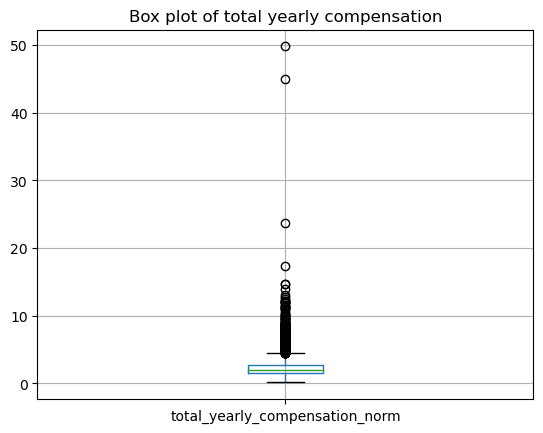

In [45]:
public_companies.boxplot('total_yearly_compensation_norm')
plt.title('Box plot of total yearly compensation')
plt.show()

### Normalized Base Salary Column

In [46]:
public_companies['base_salary_norm'].describe()

count    14208.000000
mean         1.505677
std          0.493365
min          0.100000
25%          1.200000
50%          1.460000
75%          1.710000
max          8.930000
Name: base_salary_norm, dtype: float64

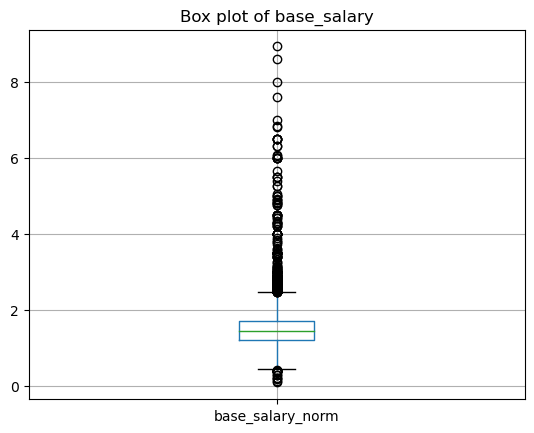

In [47]:
public_companies.boxplot('base_salary_norm')
plt.title('Box plot of base_salary')

plt.show()

fig, ax = plt.subplots()
ax.boxplot(public_companies['base_salary_norm'],
           patch_artist = True,
           boxprops = dict(facecolor = "white", color='white'),
           medianprops = dict(color = "#091720", linewidth = 1.5),
          whiskerprops = dict(color = "white", linewidth = 2),
          capprops = dict(color = "white", linewidth = 2),
          flierprops = dict(marker = 'o', markerfacecolor = "white"))
fig.patch.set_facecolor('#091720')
ax.set_facecolor('#091720')

ax.spines['bottom'].set_color('#091720')
ax.spines['top'].set_color('#091720') 
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')

plt.title('Box plot of base_salary', color='white')
plt.xlabel("base_salary_norm", color='white')
plt.ylabel("Salary (per 100k)", color='white')
plt.show()

In [48]:
public_companies = processOutliers(public_companies, 'base_salary_norm')

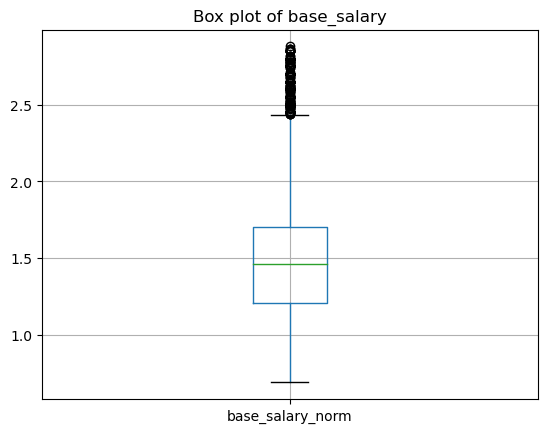

In [49]:
public_companies.boxplot('base_salary_norm')
plt.title('Box plot of base_salary')
plt.show()

fig, ax = plt.subplots()
ax.boxplot(public_companies['base_salary_norm'],
           patch_artist = True,
           boxprops = dict(facecolor = "white", color='white'),
           medianprops = dict(color = "#091720", linewidth = 1.5),
          whiskerprops = dict(color = "white", linewidth = 2),
          capprops = dict(color = "white", linewidth = 2),
          flierprops = dict(marker = 'o', markerfacecolor = "white"))
fig.patch.set_facecolor('#091720')
ax.set_facecolor('#091720')

ax.spines['bottom'].set_color('#091720')
ax.spines['top'].set_color('#091720') 
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')

plt.title('Box plot of base_salary', color='white')
plt.xlabel("base_salary_norm", color='white')
plt.ylabel("Salary (per 100k)", color='white')
plt.show()

### Years of Experience Column

In [50]:
public_companies['years_of_experience'].describe()

count    13917.000000
mean         7.327369
std          6.096159
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         45.000000
Name: years_of_experience, dtype: float64

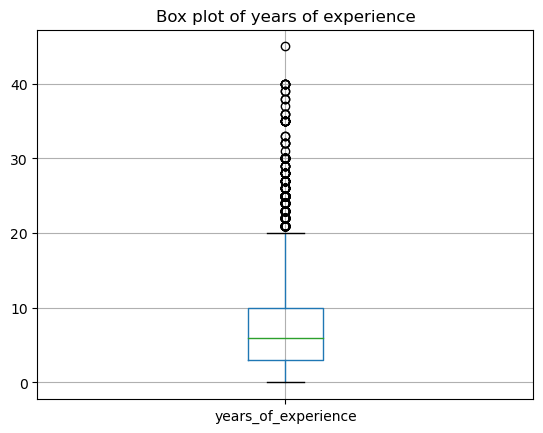

In [51]:
public_companies.boxplot('years_of_experience')
plt.title('Box plot of years of experience')
plt.show()

In [52]:
#public_companies = processOutliers(public_companies, 'years_of_experience')

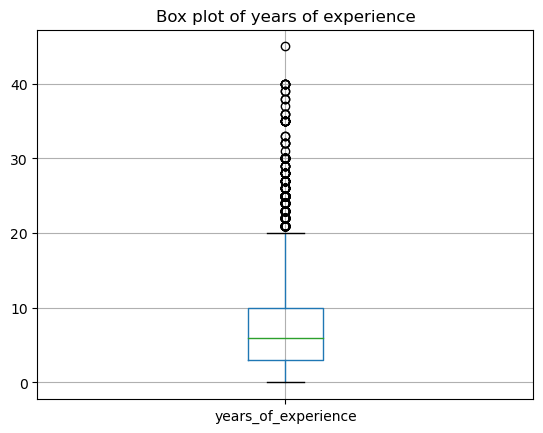

In [53]:
public_companies.boxplot('years_of_experience')
plt.title('Box plot of years of experience')
plt.show()

### Years at Company Column

In [54]:
public_companies['years_at_company'].describe()

count    13917.000000
mean         2.856291
std          3.561441
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         40.000000
Name: years_at_company, dtype: float64

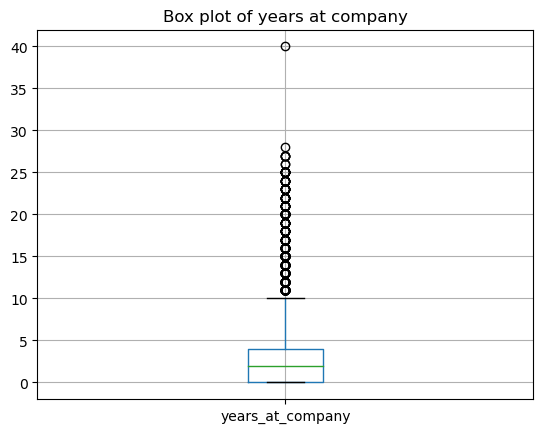

In [55]:
public_companies.boxplot('years_at_company')
plt.title('Box plot of years at company')
plt.show()

In [56]:
public_companies = processOutliers(public_companies, 'years_at_company')

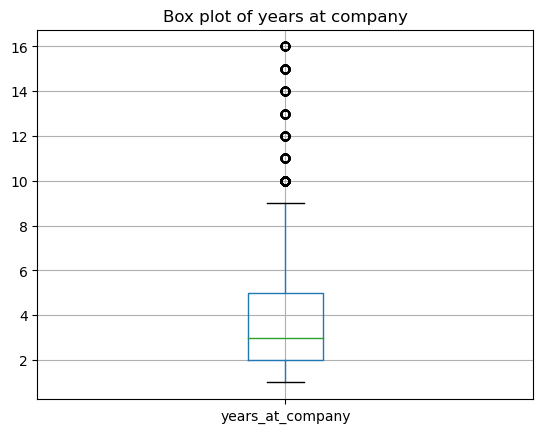

In [57]:
public_companies.boxplot('years_at_company')
plt.title('Box plot of years at company')
plt.show()

## Company Data

### Normalized Number of Employees Column

In [58]:
public_companies['employees_norm'].describe()

count    9927.000000
mean        3.405896
std         5.355428
min         0.000070
25%         0.302500
50%         1.248000
75%         2.210000
max        21.000000
Name: employees_norm, dtype: float64

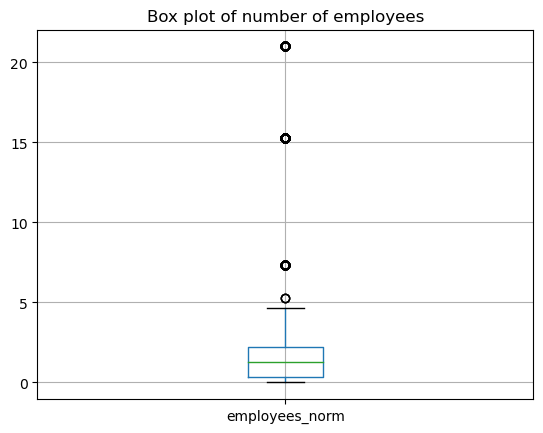

In [59]:
public_companies.boxplot('employees_norm')
plt.title('Box plot of number of employees')
plt.show()

In [60]:
public_companies = processOutliers(public_companies, 'employees_norm')

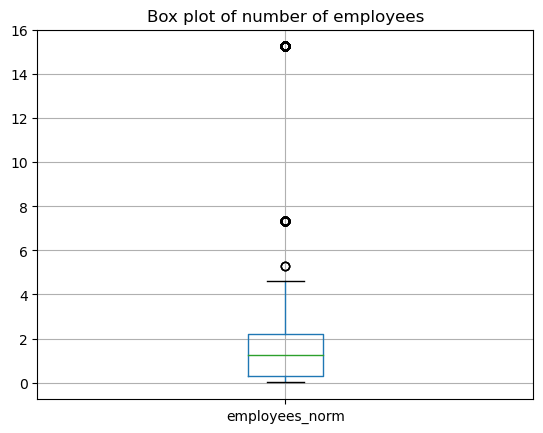

In [61]:
public_companies.boxplot('employees_norm')
plt.title('Box plot of number of employees')
plt.show()

### Normalized Revenue per Employee Column

In [62]:
public_companies['revenue_per_employee_norm'].describe()

count    9700.000000
mean        9.271152
std         9.214927
min         0.346780
25%         3.769080
50%         6.741220
75%        11.580210
max       128.519690
Name: revenue_per_employee_norm, dtype: float64

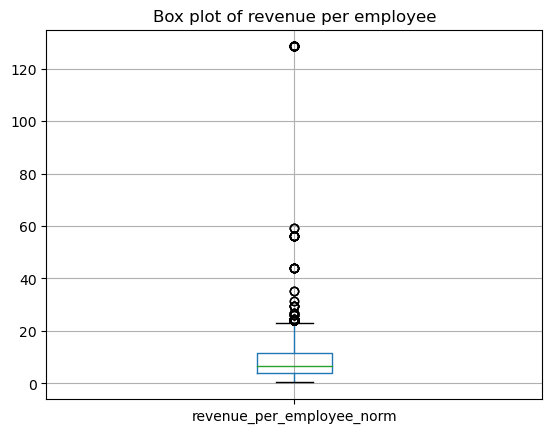

In [63]:
public_companies.boxplot('revenue_per_employee_norm')
plt.title('Box plot of revenue per employee')
plt.show()

In [64]:
public_companies = processOutliers(public_companies, 'revenue_per_employee_norm')

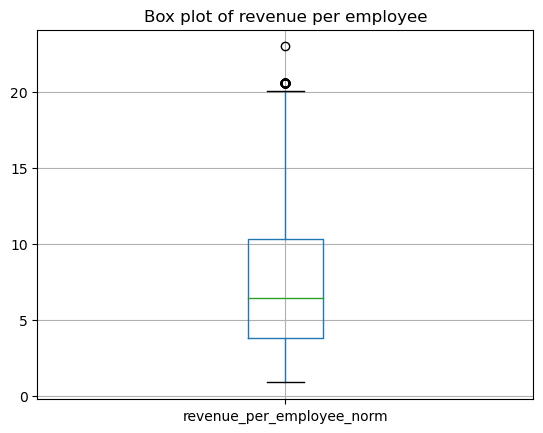

In [65]:
public_companies.boxplot('revenue_per_employee_norm')
plt.title('Box plot of revenue per employee')
plt.show()

### Normalized Profit per Employee Column

In [66]:
public_companies['profit_per_employee_norm'].describe()

count    9068.000000
mean        1.674191
std         2.106639
min        -4.688420
25%         0.199510
50%         0.648960
75%         3.734890
max        10.054050
Name: profit_per_employee_norm, dtype: float64

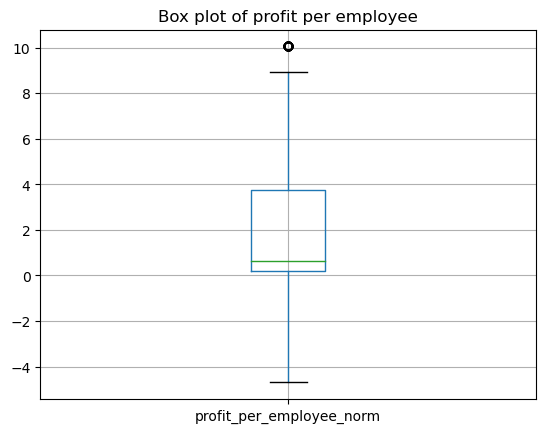

In [67]:
public_companies.boxplot('profit_per_employee_norm')
plt.title('Box plot of profit per employee')
plt.show()

fig, ax = plt.subplots()
ax.boxplot(public_companies['profit_per_employee_norm'],
           patch_artist = True,
           boxprops = dict(facecolor = "white", color='white'),
           medianprops = dict(color = "#091720", linewidth = 1.5),
          whiskerprops = dict(color = "white", linewidth = 2),
          capprops = dict(color = "white", linewidth = 2),
          flierprops = dict(marker = 'o', markerfacecolor = "white"))
fig.patch.set_facecolor('#091720')
ax.set_facecolor('#091720')

ax.spines['bottom'].set_color('#091720')
ax.spines['top'].set_color('#091720') 
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')

plt.title('Box plot of profit per employee', color='white')
plt.xlabel("profit_per_employee_norm", color='white')
plt.ylabel("Profit per employee (per 100k)", color='white')
plt.show()

### Normalized Debt Growth (YoY) column

In [68]:
public_companies['debt_growth_year_over_year_norm'].describe()

count    9006.000000
mean        0.100341
std         0.304551
min        -0.915000
25%        -0.045300
50%        -0.010000
75%         0.203800
max        14.550800
Name: debt_growth_year_over_year_norm, dtype: float64

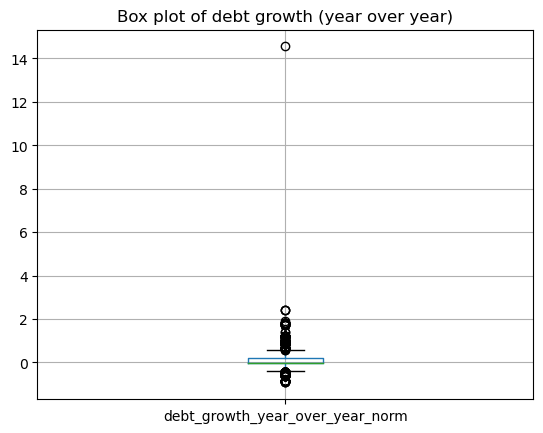

In [69]:
public_companies.boxplot('debt_growth_year_over_year_norm')
plt.title('Box plot of debt growth (year over year)')
plt.show()

In [70]:
public_companies = processOutliers(public_companies, 'debt_growth_year_over_year_norm')

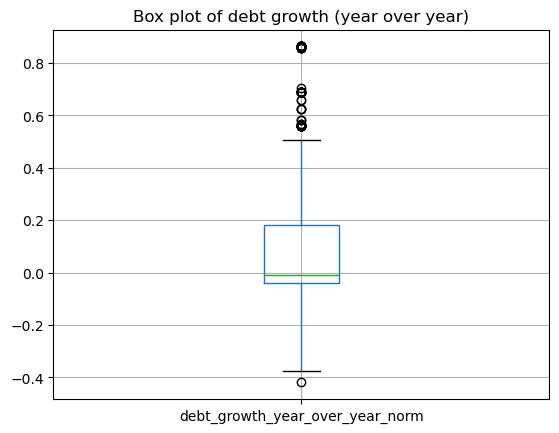

In [71]:
public_companies.boxplot('debt_growth_year_over_year_norm')
plt.title('Box plot of debt growth (year over year)')
plt.show()

### Normalized Cash Over Market Cap Column

In [72]:
public_companies['cash_over_market_cap_norm'].describe()

count    8660.000000
mean       -0.194703
std         1.303458
min       -42.670200
25%        -0.122400
50%        -0.021800
75%         0.022300
max         2.920500
Name: cash_over_market_cap_norm, dtype: float64

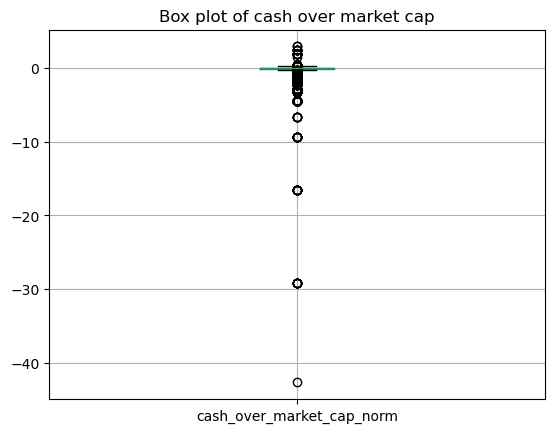

In [73]:
public_companies.boxplot('cash_over_market_cap_norm')
plt.title('Box plot of cash over market cap')
plt.show()

In [74]:
public_companies = processOutliers(public_companies, 'cash_over_market_cap_norm')

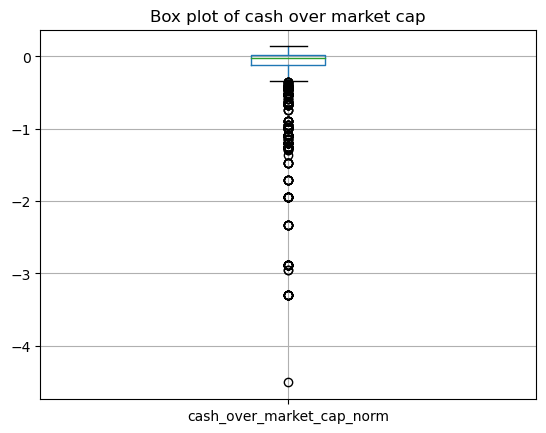

In [75]:
public_companies.boxplot('cash_over_market_cap_norm')
plt.title('Box plot of cash over market cap')
plt.show()

### RSI

In [76]:
public_companies['rsi'].describe()

count    8382.000000
mean       57.895449
std         8.067346
min        22.750000
25%        53.420000
50%        57.900000
75%        62.600000
max        81.660000
Name: rsi, dtype: float64

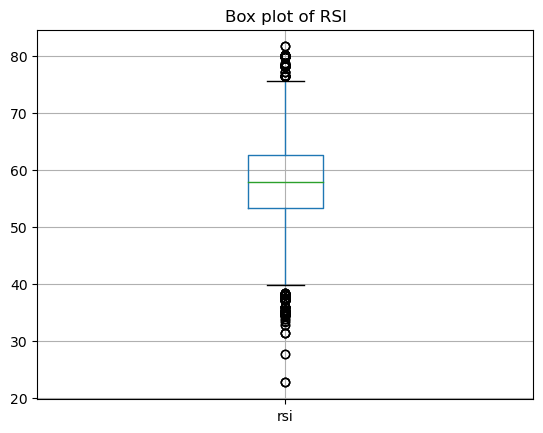

In [77]:
public_companies.boxplot('rsi')
plt.title('Box plot of RSI')
plt.show()

In [78]:
#public_companies = processOutliers(public_companies, 'rsi')

In [79]:
public_companies.shape

(8382, 24)

In [80]:
public_companies.describe()

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,employees,revenue_per_employee,profit_per_employee,rsi,total_yearly_compensation_norm,base_salary_norm,employees_norm,revenue_per_employee_norm,profit_per_employee_norm,debt_growth_year_over_year_norm,cash_over_market_cap_norm
count,8382.000000,8.382000e+03,8382.000000,8382.000000,8.382000e+03,8.382000e+03,8.382000e+03,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000
mean,149120.615605,2.275370e+05,8.131830,3.706991,3.542935e+05,8.054623e+05,1.658626e+05,57.895449,2.275370,1.491206,3.542935,8.054623,1.658626,0.086576,-0.096563
std,38185.086489,1.216136e+05,5.878674,3.009478,5.333248e+05,5.416472e+05,2.066371e+05,8.067346,1.216136,0.381851,5.333248,5.416472,2.066371,0.204768,0.302652
min,69000.000000,6.900000e+04,1.000000,1.000000,1.321000e+03,8.825100e+04,-4.688420e+05,22.750000,0.690000,0.690000,0.013210,0.882510,-4.688420,-0.374500,-4.506800
25%,123000.000000,1.490000e+05,4.000000,2.000000,5.000000e+04,3.769080e+05,1.995100e+04,53.420000,1.490000,1.230000,0.500000,3.769080,0.199510,-0.041700,-0.122400
50%,147000.000000,2.000000e+05,7.000000,3.000000,1.499000e+05,5.788080e+05,6.489600e+04,57.900000,2.000000,1.470000,1.499000,5.788080,0.648960,-0.010400,-0.021800
75%,170000.000000,2.710000e+05,11.000000,5.000000,2.210000e+05,1.029787e+06,3.734890e+05,62.600000,2.710000,1.700000,2.210000,10.297870,3.734890,0.171600,0.022300
max,288000.000000,1.733000e+06,40.000000,16.000000,1.525000e+06,2.298493e+06,1.005405e+06,81.660000,17.330000,2.880000,15.250000,22.984930,10.054050,0.863000,0.136900


# Categorical Data
## Individual Data

### Education Level

In [81]:
public_companies['education'].describe()

count                  8382
unique                    5
top       Bachelor's Degree
freq                   3972
Name: education, dtype: object

In [82]:
public_companies.groupby('education')['base_salary'].count()

education
Bachelor's Degree    3972
Highschool            107
Master's Degree      3722
PhD                   444
Some College          137
Name: base_salary, dtype: int64

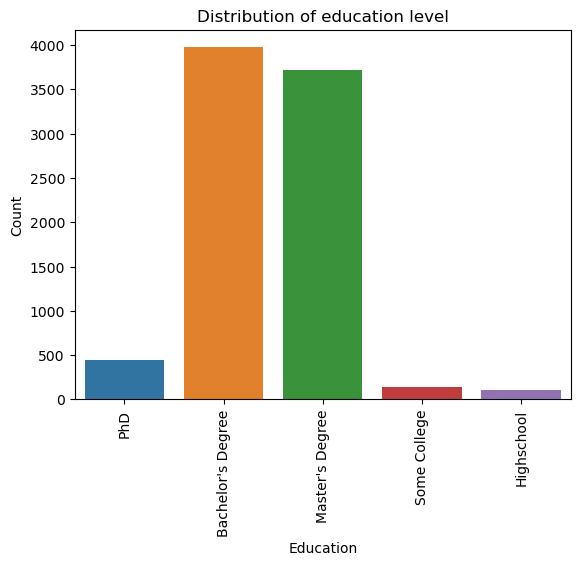

In [83]:
sns.countplot(x='education', data=public_companies)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of education level')
plt.xticks(rotation=90)
plt.show()

import seaborn as sns1
sns1.set(rc={'axes.facecolor':'#091720', 'figure.facecolor':'#091720'})

sns1.countplot(x='education', data=public_companies, color='white')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of education level')
plt.xticks(color = 'white', rotation=45)
plt.yticks(color='white')

sns1.set_style({'grid' : False})
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#091720')
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')
ax.grid(False)


plt.title('Distribution of education', color='white')
plt.xlabel("Education level", color='white')
plt.ylabel("Count", color='white')

plt.show()

## Title

In [84]:
public_companies['title'].describe()

count                  8382
unique                   15
top       Software Engineer
freq                   4769
Name: title, dtype: object

In [85]:
public_companies.groupby('title')['base_salary'].count()

title
Business Analyst                 181
Data Scientist                   354
Hardware Engineer                352
Human Resources                   86
Management Consultant             47
Marketing                        210
Mechanical Engineer              120
Product Designer                 289
Product Manager                  751
Recruiter                        118
Sales                             99
Software Engineer               4769
Software Engineering Manager     486
Solution Architect               173
Technical Program Manager        347
Name: base_salary, dtype: int64

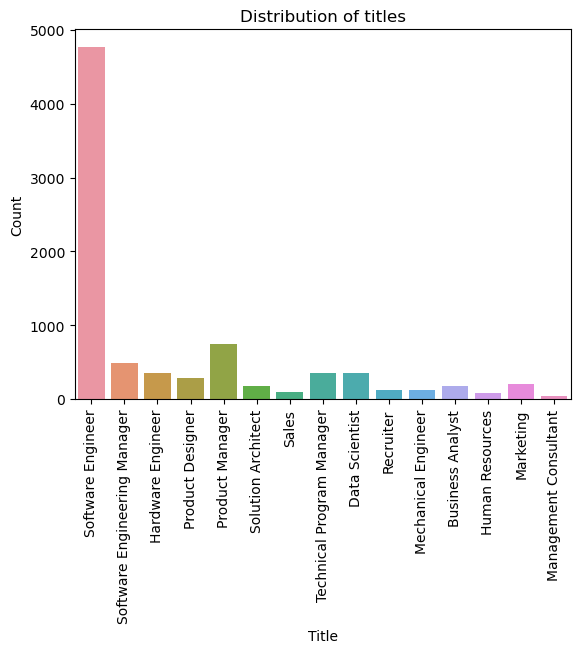

In [86]:
sns.countplot(x='title', data=public_companies)
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Distribution of titles')
plt.xticks(rotation=90)
plt.show()

### Race

In [87]:
public_companies['race'].describe()

count      8382
unique        5
top       Asian
freq       4153
Name: race, dtype: object

In [88]:
public_companies.groupby('race')['base_salary'].count()

race
Asian          4153
Black           243
Hispanic        472
Two Or More     296
White          3218
Name: base_salary, dtype: int64

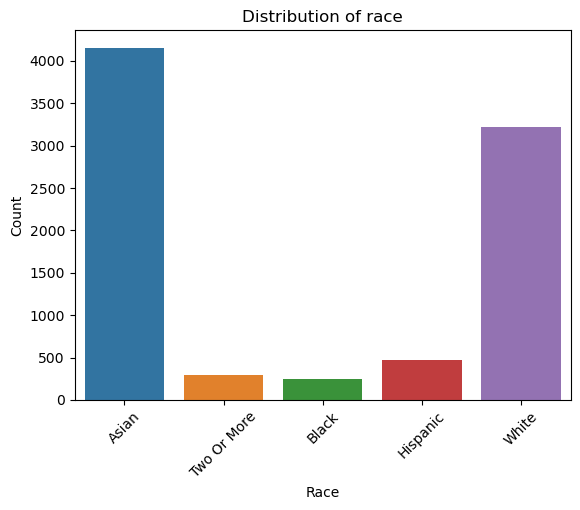

In [89]:
sns.countplot(x='race', data=public_companies)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of race')
plt.xticks(rotation=45)
plt.show()

### Sex

In [90]:
public_companies['sex'].describe()

count     8382
unique       3
top       Male
freq      6617
Name: sex, dtype: object

In [91]:
public_companies.groupby('sex')['base_salary'].count()

sex
Female    1728
Male      6617
Other       37
Name: base_salary, dtype: int64

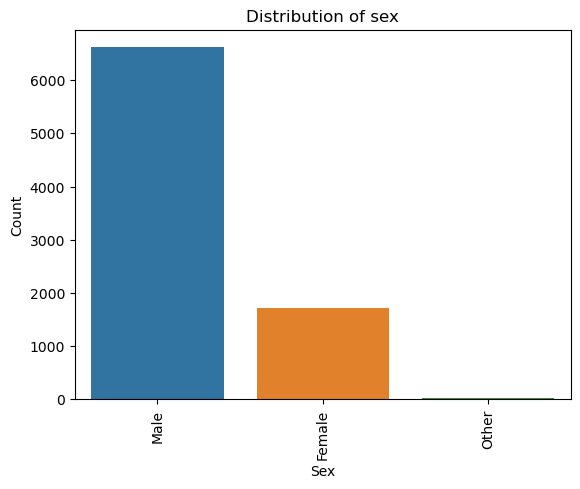

In [92]:
sns.countplot(x='sex', data=public_companies)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex')
plt.xticks(rotation=90)
plt.show()

## Company Data
### Market Cap Group

In [93]:
public_companies['mc_group'].describe()

count         8382
unique           5
top       Mega-Cap
freq          4932
Name: mc_group, dtype: object

In [94]:
public_companies.groupby('mc_group')['base_salary'].count()

mc_group
Large-Cap    2891
Mega-Cap     4932
Micro-Cap       2
Mid-Cap       485
Small-Cap      72
Name: base_salary, dtype: int64

In [95]:
public_companies = public_companies.drop(public_companies[public_companies['mc_group'] == 'Micro-Cap'].index)

In [96]:
public_companies.groupby('mc_group')['base_salary'].count()

mc_group
Large-Cap    2891
Mega-Cap     4932
Mid-Cap       485
Small-Cap      72
Name: base_salary, dtype: int64

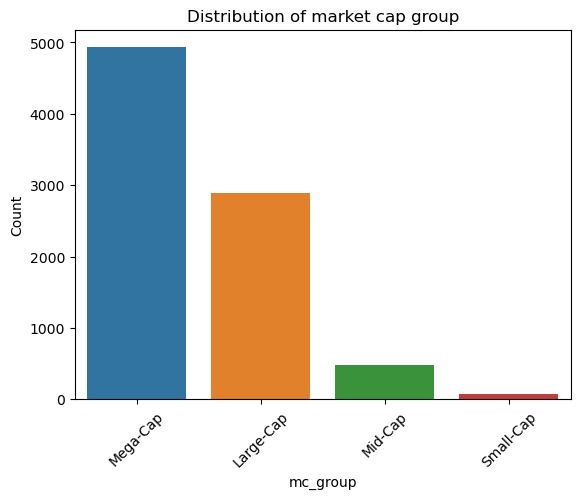

In [97]:
sns.countplot(x='mc_group', data=public_companies)
plt.xlabel('mc_group')
plt.ylabel('Count')
plt.title('Distribution of market cap group')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='mc_group', data=public_companies, color='white')
plt.xlabel('Market cap group', color='white')
plt.ylabel('Count', color='white')
plt.title('Distribution of market cap group', color='white')
plt.xticks(color = 'white', rotation=45)
plt.yticks(color='white')

sns.set_style({'grid' : False})
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#091720')
ax.spines['right'].set_color('#091720')
ax.spines['left'].set_color('white')
ax.tick_params(axis='y', colors='white')




plt.show()

### Sector

In [98]:
public_companies['sector'].describe()

count           8380
unique            10
top       Technology
freq            3515
Name: sector, dtype: object

In [99]:
public_companies.groupby('sector')['base_salary'].count()

sector
Communication Services    1706
Consumer Discretionary    1916
Consumer Staples            45
Energy                       5
Financials                 710
Healthcare                 125
Industrials                342
Materials                    4
Real Estate                 12
Technology                3515
Name: base_salary, dtype: int64

In [100]:
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Energy'].index)
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Materials'].index)
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Real Estate'].index)

In [101]:
public_companies.groupby('sector')['base_salary'].count()

sector
Communication Services    1706
Consumer Discretionary    1916
Consumer Staples            45
Financials                 710
Healthcare                 125
Industrials                342
Technology                3515
Name: base_salary, dtype: int64

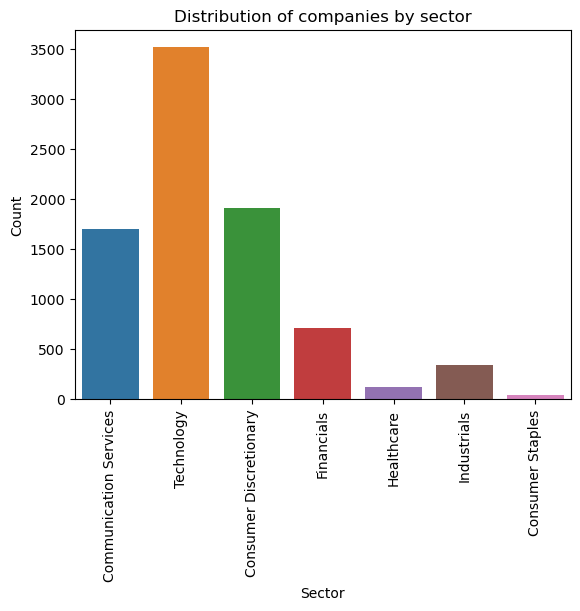

In [102]:
sns.countplot(x='sector', data=public_companies)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Distribution of companies by sector')
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

## Individual Data
### Education

label_encoder = LabelEncoder()
public_companies['education_encoded'] = label_encoder.fit_transform(public_companies['education'])
public_companies.sample(5)

In [103]:
public_companies_copy = public_companies
public_companies = pd.get_dummies(public_companies, columns=['education'], prefix='education', drop_first=True, dtype=int)
public_companies.sample(5)

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,race,sex,mc_group,sector,industry,...,base_salary_norm,employees_norm,revenue_per_employee_norm,profit_per_employee_norm,debt_growth_year_over_year_norm,cash_over_market_cap_norm,education_Highschool,education_Master's Degree,education_PhD,education_Some College
2241,170000,227000,Product Designer,11,1,White,Male,Mid-Cap,Consumer Discretionary,Specialty Retail,...,1.70,0.02420,11.35693,1.27094,-0.0002,-0.1543,0,0,0,0
6860,165000,220000,Software Engineer,3,1,Asian,Male,Mega-Cap,Consumer Discretionary,Specialty Retail,...,1.65,15.25000,3.76908,0.19951,-0.0322,-0.0264,0,0,0,0
9325,186000,356000,Software Engineer,5,5,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,...,1.86,1.82381,16.85450,4.04620,-0.0547,0.0454,0,0,0,0
4453,156000,301000,Software Engineer,10,6,White,Male,Mid-Cap,Consumer Discretionary,Specialty Retail,...,1.56,0.14400,8.33542,-0.51250,-0.0189,-0.3152,0,0,0,0
4633,115000,155000,Software Engineer,5,5,White,Male,Large-Cap,Financials,Financial Data & Stock Exchanges,...,1.15,0.08525,7.11320,1.24223,0.8580,-0.2850,0,0,0,0


### Title

label_encoder = LabelEncoder()
public_companies['title_encoded'] = label_encoder.fit_transform(public_companies['title'])
public_companies.sample(5)

In [104]:
public_companies = pd.get_dummies(public_companies, columns=['title'], prefix='title', drop_first=True, dtype=int)
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,race,sex,mc_group,sector,industry,employees,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
16061,150000,195000,9,7,White,Male,Mega-Cap,Communication Services,Entertainment,225000.0,...,0,0,0,1,0,0,0,0,0,0
14968,175000,300000,11,2,Asian,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,...,0,0,0,1,0,0,0,0,0,0
1253,175000,238000,5,2,Asian,Male,Mega-Cap,Consumer Discretionary,Specialty Retail,1525000.0,...,0,0,0,1,0,0,0,0,0,0
14867,169000,363000,3,3,White,Female,Large-Cap,Communication Services,Internet Content & Information,5289.0,...,0,0,0,0,0,0,1,0,0,0
2326,115000,119000,3,3,Asian,Male,Large-Cap,Technology,Information Technology Services,282200.0,...,0,0,0,0,0,0,1,0,0,0


### Race

label_encoder = LabelEncoder()
public_companies['race_encoded'] = label_encoder.fit_transform(public_companies['race'])
public_companies.sample(5)

In [105]:
public_companies = pd.get_dummies(public_companies, columns=['race'], prefix='race', drop_first=True, dtype=int)
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,sex,mc_group,sector,industry,employees,revenue_per_employee,...,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager,race_Black,race_Hispanic,race_Two Or More,race_White
13648,170000,201000,18,10,Male,Mega-Cap,Financials,Banks - Diversified,213000.0,462822.0,...,0,0,0,1,0,0,0,0,0,0
16265,120000,128000,15,1,Male,Mega-Cap,Consumer Staples,Household & Personal Products,107000.0,784421.0,...,0,0,0,0,0,0,0,0,0,1
10949,93000,96000,12,2,Male,Large-Cap,Technology,Scientific & Technical Instruments,14900.0,358523.0,...,0,0,1,0,0,0,0,1,0,0
3396,150000,360000,9,3,Female,Mega-Cap,Consumer Discretionary,Specialty Retail,1525000.0,376908.0,...,0,0,0,0,0,0,0,1,0,0
10257,250000,460000,15,3,Male,Large-Cap,Technology,Software - Application,7004.0,400698.0,...,0,0,0,0,0,0,0,0,1,0


### Sex

label_encoder = LabelEncoder()
public_companies['sex_encoded'] = label_encoder.fit_transform(public_companies['sex'])
public_companies.sample(5)

In [106]:
public_companies = pd.get_dummies(public_companies, columns=['sex'], prefix='sex', drop_first=True, dtype=int)
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,...,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager,race_Black,race_Hispanic,race_Two Or More,race_White,sex_Male,sex_Other
12431,116000,132000,1,1,Mid-Cap,Consumer Discretionary,Department Stores,54000.0,272093.0,2481.0,...,1,0,0,0,0,0,0,0,1,0
6052,120000,135000,4,4,Large-Cap,Technology,Software - Application,18800.0,386117.0,73457.0,...,1,0,0,0,0,0,0,0,1,0
3587,90000,110000,4,4,Large-Cap,Technology,Semiconductors,124800.0,434519.0,13534.0,...,0,0,0,0,0,0,0,0,1,0
15211,160000,780000,18,2,Mega-Cap,Consumer Discretionary,Specialty Retail,1525000.0,376908.0,19951.0,...,0,1,0,0,0,0,0,1,1,0
49,191000,334000,11,3,Mega-Cap,Communication Services,Internet Content & Information,67317.0,2003981.0,580804.0,...,1,0,0,0,0,1,0,0,1,0


## Company Data

## Market Cap Group

label_encoder = LabelEncoder()
public_companies['mc_group_encoded'] = label_encoder.fit_transform(public_companies['mc_group'])
public_companies.sample(5)

In [107]:
public_companies = pd.get_dummies(public_companies, columns=['mc_group'], prefix='mc_group', drop_first=True, dtype=int)
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,...,title_Technical Program Manager,race_Black,race_Hispanic,race_Two Or More,race_White,sex_Male,sex_Other,mc_group_Mega-Cap,mc_group_Mid-Cap,mc_group_Small-Cap
15273,125000,206000,15,3,Technology,Software - Application,18200.0,829341.0,152198.0,-2.18%,...,0,0,0,0,0,0,0,0,0,0
2500,185000,275000,25,1,Technology,Software - Application,22668.0,395756.0,76363.0,1.67%,...,0,0,0,0,1,1,0,0,0,0
15503,200000,230000,18,11,Consumer Discretionary,Travel Services,17100.0,750819.0,46608.0,-4.69%,...,0,0,0,0,0,0,0,0,0,0
8387,135000,138000,14,4,Technology,Software - Infrastructure,164000.0,320183.0,64896.0,-22.46%,...,0,0,0,0,0,1,0,1,0,0
9186,240000,450000,15,12,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,...,0,0,0,0,1,1,0,1,0,0


## Sector

label_encoder = LabelEncoder()
public_companies['sector_encoded'] = label_encoder.fit_transform(public_companies['sector'])
public_companies.sample(5)

In [108]:
public_companies = pd.get_dummies(public_companies, columns=['sector'], prefix='sector', drop_first=True, dtype=int)
public_companies.sample(5)

,base_salary,total_yearly_compensation,years_of_experience,years_at_company,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,debt_growth_year_over_year,...,sex_Other,mc_group_Mega-Cap,mc_group_Mid-Cap,mc_group_Small-Cap,sector_Consumer Discretionary,sector_Consumer Staples,sector_Financials,sector_Healthcare,sector_Industrials,sector_Technology
4509,120000,160000,1,1,Specialty Retail,1525000.0,376908.0,19951.0,-2.64%,-3.22%,...,0,1,0,0,1,0,0,0,0,0
9336,150000,206000,10,1,Specialty Retail,1525000.0,376908.0,19951.0,-2.64%,-3.22%,...,0,1,0,0,1,0,0,0,0,0
1183,168000,228000,21,12,Software - Application,2779.0,294866.0,-254.0,6.25%,7.74%,...,0,0,1,0,0,0,0,0,0,1
6031,83000,96000,1,1,Software - Application,72682.0,479582.0,56905.0,0.54%,-10.65%,...,0,1,0,0,0,0,0,0,0,1
12258,118000,118000,13,4,Scientific & Technical Instruments,19900.0,262726.0,64806.0,6.56%,-1.31%,...,0,0,0,0,0,0,0,0,0,1


In [109]:
for column in public_companies.columns:
    print(column)

base_salary
total_yearly_compensation
years_of_experience
years_at_company
industry
employees
revenue_per_employee
profit_per_employee
cash_over_market_cap
debt_growth_year_over_year
rsi
total_yearly_compensation_norm
base_salary_norm
employees_norm
revenue_per_employee_norm
profit_per_employee_norm
debt_growth_year_over_year_norm
cash_over_market_cap_norm
education_Highschool
education_Master's Degree
education_PhD
education_Some College
title_Data Scientist
title_Hardware Engineer
title_Human Resources
title_Management Consultant
title_Marketing
title_Mechanical Engineer
title_Product Designer
title_Product Manager
title_Recruiter
title_Sales
title_Software Engineer
title_Software Engineering Manager
title_Solution Architect
title_Technical Program Manager
race_Black
race_Hispanic
race_Two Or More
race_White
sex_Male
sex_Other
mc_group_Mega-Cap
mc_group_Mid-Cap
mc_group_Small-Cap
sector_Consumer Discretionary
sector_Consumer Staples
sector_Financials
sector_Healthcare
sector_Industri

# Correlation Analysis

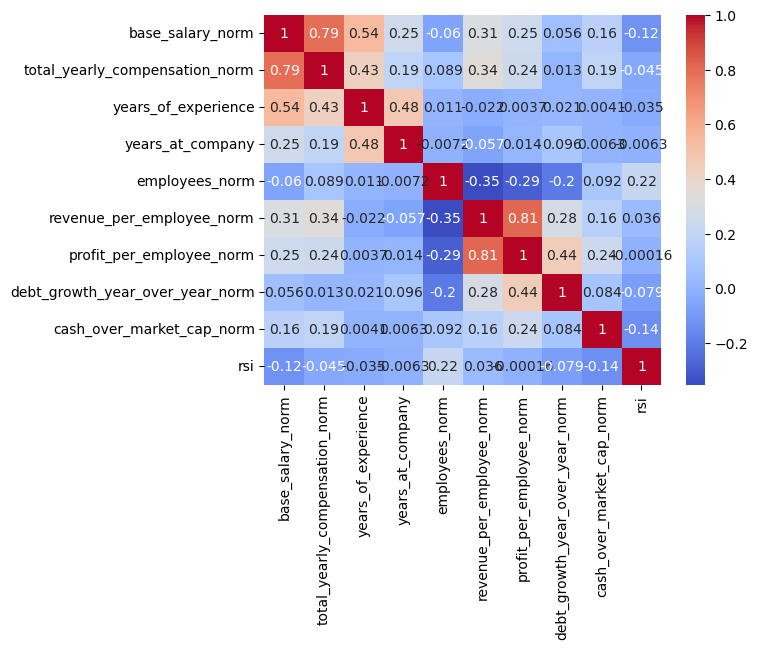

In [110]:
public_companies_cleaned = public_companies[['base_salary_norm', 'total_yearly_compensation_norm', 'years_of_experience', 'years_at_company',
                                             'employees_norm', 'revenue_per_employee_norm',
                                             'profit_per_employee_norm', 'debt_growth_year_over_year_norm', 'cash_over_market_cap_norm', 'rsi']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)

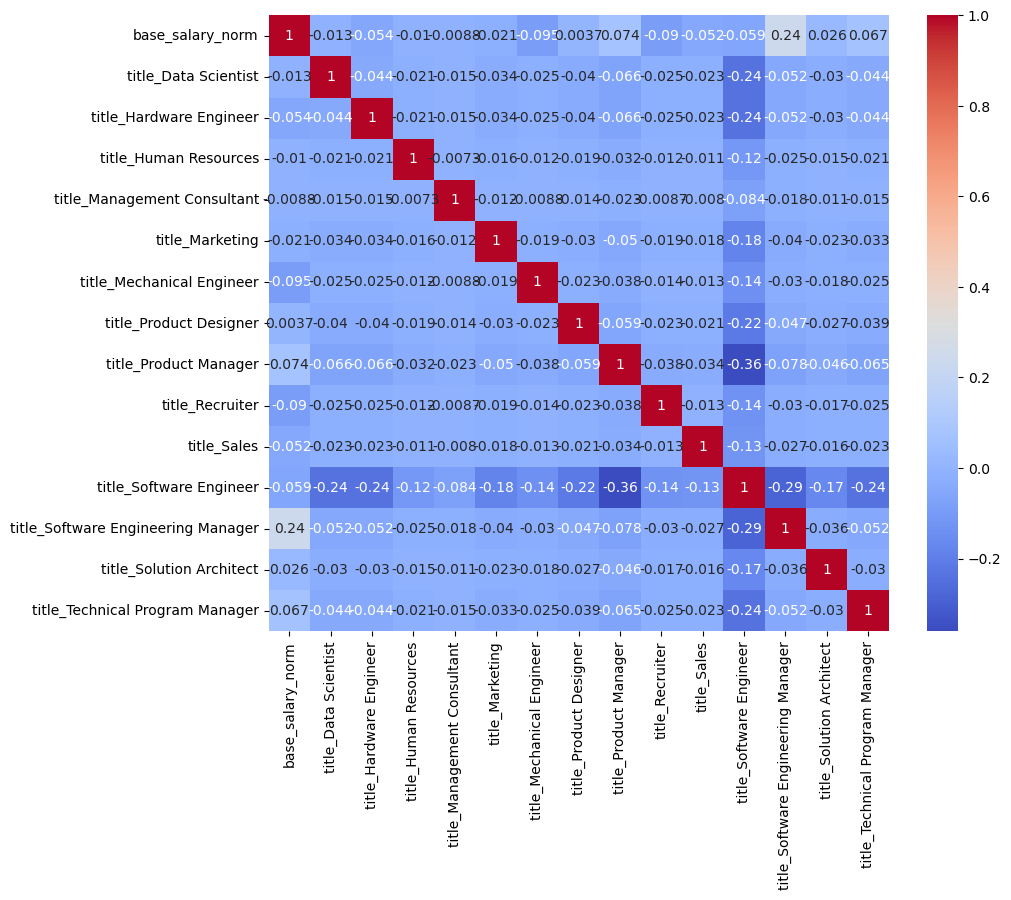

In [111]:
public_companies_cleaned = public_companies[['base_salary_norm', 'title_Data Scientist',
                                             'title_Hardware Engineer', 'title_Human Resources', 'title_Management Consultant',
                                             'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                             'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                             'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)

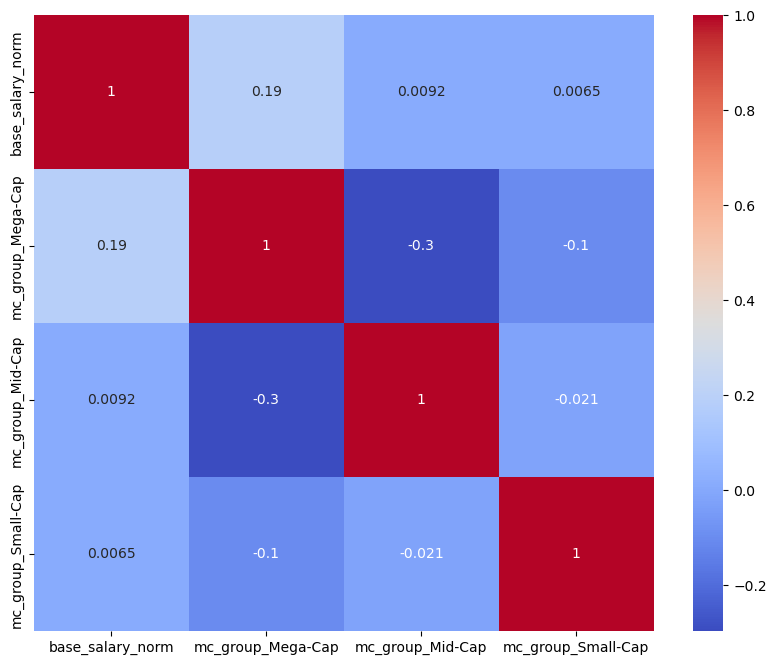

In [112]:
public_companies_cleaned = public_companies[['base_salary_norm', 'mc_group_Mega-Cap',
                                             'mc_group_Mid-Cap', 'mc_group_Small-Cap']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)


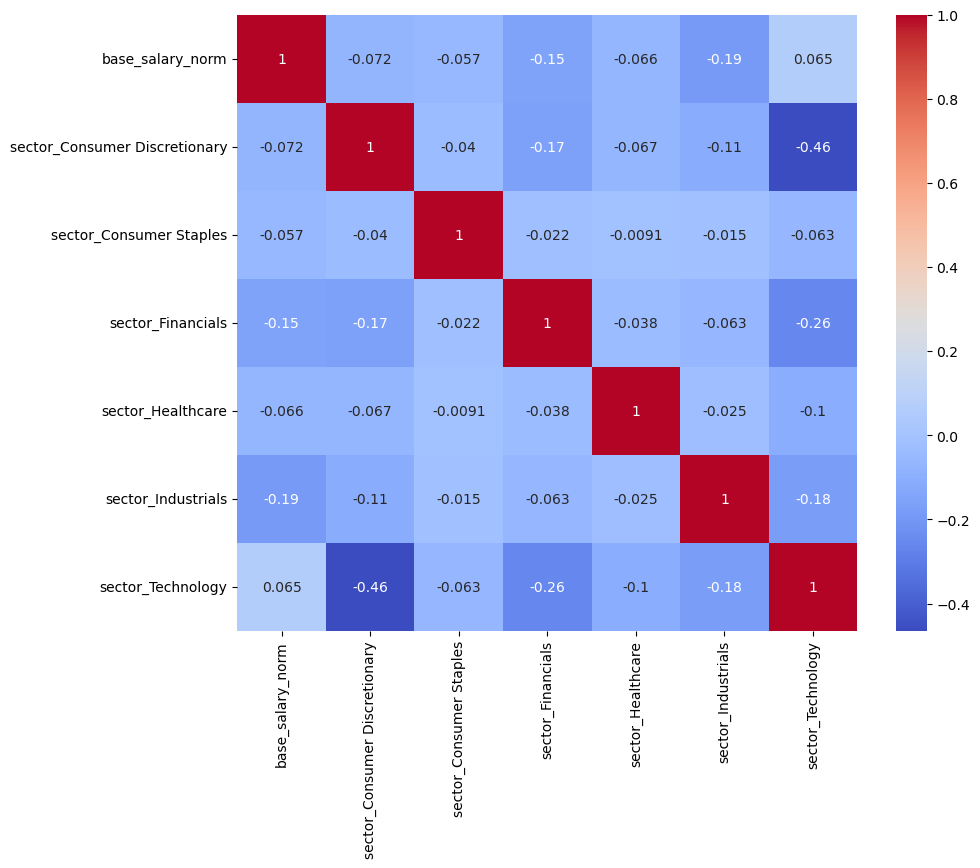

In [113]:
public_companies_cleaned = public_companies[['base_salary_norm', 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                             'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                             'sector_Technology']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)


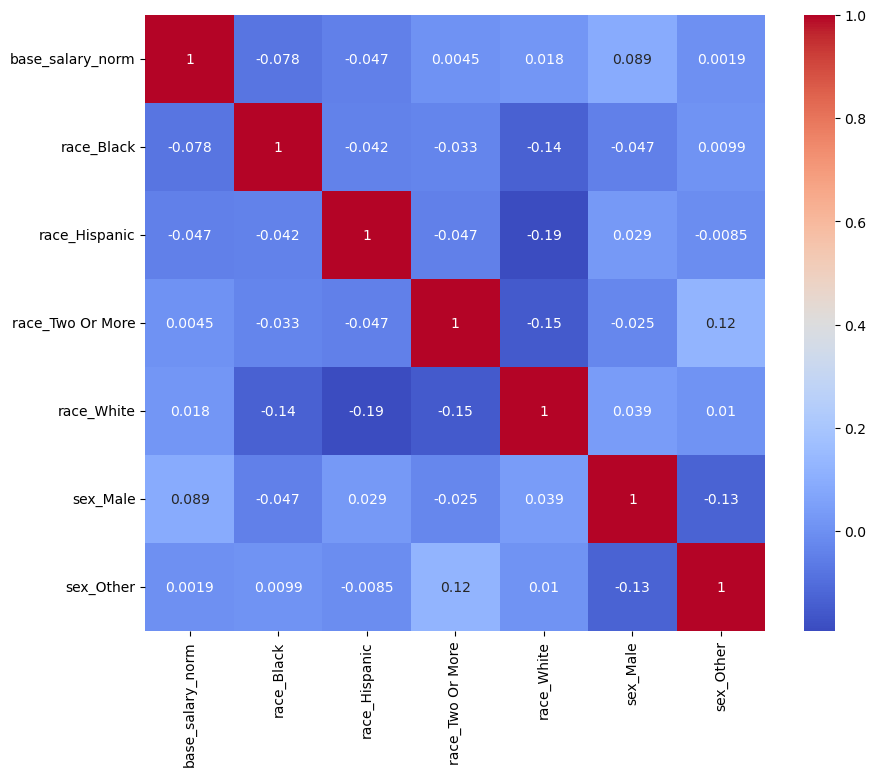

In [114]:
public_companies_cleaned = public_companies[['base_salary_norm', 'race_Black', 'race_Hispanic', 'race_Two Or More', 'race_White',
                                             'sex_Male', 'sex_Other']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()
#print("Relevant features based on correlation:")
#print(relevant_features)


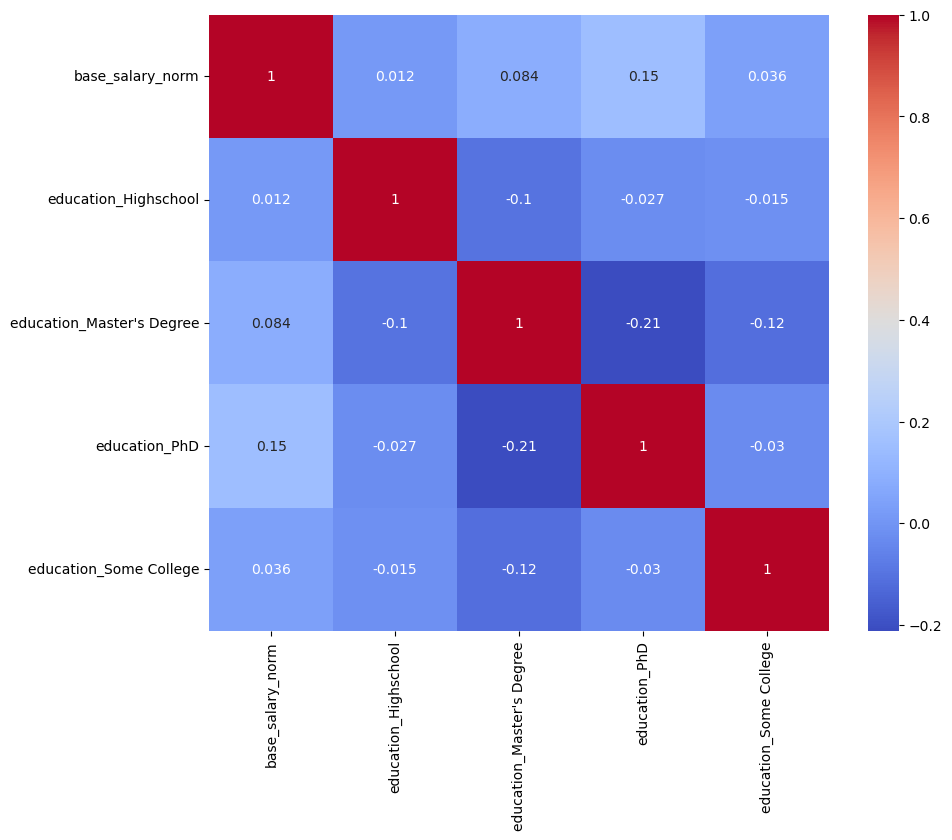

In [115]:
public_companies_cleaned = public_companies[['base_salary_norm', 'education_Highschool',
                                             'education_Master\'s Degree', 'education_PhD', 'education_Some College']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['base_salary_norm'].abs() > threshold) & (corr_matrix.index != 'base_salary_norm')].index.tolist()

public_companies_cleaned = public_companies[['base_salary_norm', 'total_yearly_compensation_norm', 'years_of_experience', 'years_at_company', 'education_encoded',
                                             'title_encoded', 'race_encoded', 'sex_encoded', 'mc_group_encoded', 'sector_encoded', 'employees_norm', 'revenue_per_employee_norm',
                                             'profit_per_employee_norm', 'debt_growth_year_over_year_norm', 'cash_over_market_cap_norm', 'rsi']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", color='white')
plt.xticks(color = 'white')
plt.yticks(color='white')
plt.show()

# Refining Variables

### In this section, we will be evaluating the variables we are using to predict base salary.  Our goal is to minimize the number of variables and maximize the effectiveness of the remaining variables.

In [116]:
#creating a new dataset with variables of interest
public_companies_cleaned = public_companies[['base_salary_norm', 'years_of_experience', 'years_at_company', 'employees_norm', 'revenue_per_employee_norm',
                                             'profit_per_employee_norm', 'debt_growth_year_over_year_norm', 'cash_over_market_cap_norm', 'rsi', 'title_Data Scientist',
                                             'title_Hardware Engineer', 'title_Human Resources', 'title_Management Consultant',
                                             'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                             'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                             'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager', 'mc_group_Mega-Cap',
                                             'mc_group_Mid-Cap', 'mc_group_Small-Cap', 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                             'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                             'sector_Technology', 'race_Black', 'race_Hispanic', 'race_Two Or More', 'race_White',
                                             'sex_Male', 'sex_Other', 'education_Highschool',
                                             'education_Master\'s Degree', 'education_PhD', 'education_Some College']]

In [117]:
public_companies_cleaned = public_companies_cleaned.drop(columns=['profit_per_employee_norm', 'years_at_company'], inplace=False)

>Profit per employee has a collinear relationship with revenue per employee.  Profit per employee is a function of revenue per employee and influenced by external factors like debt taken on by a company for the given year.  This makes it a less reliable predictor, therefore we are dropping it from the variables of interest.

>Years at company has a collinear relationship with years of experience, however years of experience is a more reliable metric due to its holistic nature.  It is for this reason we are dropping years at company from the variables of interest.

In [118]:
public_companies_cleaned = public_companies_cleaned.drop(columns=['rsi', 'cash_over_market_cap_norm', 'debt_growth_year_over_year_norm'], inplace=False)

>RSI, or the relative strength index is a metric for evaluating if a stock is overbought or oversold.  This is a function of stock price and volume over time.  RSI is a highly time sensitive metric and with little direct relationship to predicting base salary, therefore we are dropping it from the dataset.

> Cash over market cap is a measure of the cash a company has on hand relative to the market cap of the stock.  The market cap is the number of outstanding shares times the stock price.  Because of the proportional property of this metric we are dropping it from the dataset in lieu of more direct variables like revenue per employee.

> Debt growth year over year is also a highly time sensitive metric.  Given that our dataset has entries dating back to 2016 and our stock market data is current, we have eliminated this from being a variable of interest.

## Split dataset and add constant for modeling

In [119]:
X = public_companies_cleaned.drop(['base_salary_norm'], axis=1)
X.head(3)

,years_of_experience,employees_norm,revenue_per_employee_norm,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,...,race_Black,race_Hispanic,race_Two Or More,race_White,sex_Male,sex_Other,education_Highschool,education_Master's Degree,education_PhD,education_Some College
0,5,1.82381,16.85450,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3,2.21000,10.29787,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,6,1.82381,16.85450,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
y = public_companies_cleaned['base_salary_norm']
y.head(3)

0    2.10
1    1.24
2    1.77
Name: base_salary_norm, dtype: float64

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Multivariate Linear Regression Modeling

## Numerical Variables

Our goal is to evaluate numerical variables based on p-value.  Those with a p-value over .05 will be eliminated from the model.  This will be done one by one with the maximum p-value being removed on each iteration.

In [123]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [124]:
lm1 = sm.OLS(y_train, X_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       base_salary_norm   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     156.1
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:41   Log-Likelihood:                -640.80
No. Observations:                5851   AIC:                             1356.
Df Residuals:                    5814   BIC:                             1603.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [125]:
X_train = X_train.drop(columns='employees_norm', inplace=False)
X_test = X_test.drop(columns='employees_norm', inplace=False)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     160.4
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:41   Log-Likelihood:                -641.79
No. Observations:                5851   AIC:                             1356.
Df Residuals:                    5815   BIC:                             1596.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8005      0.030     26.289      0.000       0.741       0.860
years_of_experience                    0.0332      0.001     49.230      0.000       0.032       0.035
revenue_per_employee_norm              0.0183      0.001     18.551      0.000       0.016       0.020
title_Data Scientist                   0.2449      0.030      8.105      0.000       0.186       0.304
title_Hardware Engineer                0.1144      0.031      3.746      0.000       0.055       0.174
title_Human Resources                  0.0582      0.044      1.325      0.185      -0.028       0.144
title_Management Consultant            0.2134      0.057      3.756      0.000       0.102       0.325
title_Marketing                        0.1085      0.033      3.238      0.001       0.043       0.174
title_Mechanical Engineer              0.0825      0.039      2.124      0.034       0.006       0.159
title_Product Designer                 0.2246      0.031      7.246      0.000       0.164       0.285
title_Product Manager                  0.2944      0.027     10.900      0.000       0.241       0.347
title_Recruiter                       -0.0713      0.040     -1.794      0.073      -0.149       0.007
title_Sales                            0.0265      0.040      0.655      0.512      -0.053       0.106
title_Software Engineer                0.2516      0.025     10.207      0.000       0.203       0.300
title_Software Engineering Manager     0.3595      0.029     12.422      0.000       0.303       0.416
title_Solution Architect               0.1382      0.035      3.901      0.000       0.069       0.208
title_Technical Program Manager        0.1700      0.030      5.654      0.000       0.111       0.229
mc_group_Mega-Cap                      0.0343      0.009      3.898      0.000       0.017       0.051
mc_group_Mid-Cap                       0.0571      0.017      3.446      0.001       0.025       0.090
mc_group_Small-Cap                     0.0492      0.041      1.197      0.231      -0.031       0.130
sector_Consumer Discretionary         -0.0204      0.015     -1.346      0.178      -0.050       0.009
sector_Consumer Staples               -0.1313      0.050     -2.619      0.009      -0.230      -0.033
sector_Financials                     -0.1465      0.017     -8.668      0.000      -0.180      -0.113
sector_Healthcare                     -0.1451      0.032     -4.605      0.000      -0.207      -0.083
sector_Industrials                    -0.2333      0.023    -10.141      0.000      -0.278      -0.188
sector_Technology                      0.0007      0.013      0.059      0.953      -0.024       0.025
race_Black                            -0.1016      0.022     -4.618      0.000      -0.145      

# Analyze Removal of Categorical Variables

Here we will be test building a model without each of the categorical variables with replacement.  We expect the overall fit of the model to decrease with each variable removed, however those with little impact on the overall fit will be removed from the variables of interest to maximize the effect of the most significant variables.

## Test Removing Education

In [126]:
X_train1 = X_train.drop(columns=['education_Highschool', 'education_Some College', 'education_Master\'s Degree', 'education_PhD'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     169.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:42   Log-Likelihood:                -735.67
No. Observations:                5851   AIC:                             1535.
Df Residuals:                    5819   BIC:                             1749.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8236      0.031     26.865      0.000       0.763       0.884
years_of_experience                    0.0335      0.001     49.113      0.000       0.032       0.035
revenue_per_employee_norm              0.0188      0.001     18.840      0.000       0.017       0.021
title_Data Scientist                   0.3045      0.030     10.025      0.000       0.245       0.364
title_Hardware Engineer                0.1473      0.031      4.763      0.000       0.087       0.208
title_Human Resources                  0.0756      0.045      1.695      0.090      -0.012       0.163
title_Management Consultant            0.2221      0.058      3.851      0.000       0.109       0.335
title_Marketing                        0.1085      0.034      3.191      0.001       0.042       0.175
title_Mechanical Engineer              0.1003      0.039      2.543      0.011       0.023       0.178
title_Product Designer                 0.2262      0.031      7.189      0.000       0.165       0.288
title_Product Manager                  0.2992      0.027     10.919      0.000       0.246       0.353
title_Recruiter                       -0.0868      0.040     -2.151      0.031      -0.166      -0.008
title_Sales                            0.0173      0.041      0.422      0.673      -0.063       0.098
title_Software Engineer                0.2547      0.025     10.173      0.000       0.206       0.304
title_Software Engineering Manager     0.3666      0.029     12.475      0.000       0.309       0.424
title_Solution Architect               0.1333      0.036      3.709      0.000       0.063       0.204
title_Technical Program Manager        0.1711      0.031      5.599      0.000       0.111       0.231
mc_group_Mega-Cap                      0.0362      0.009      4.055      0.000       0.019       0.054
mc_group_Mid-Cap                       0.0520      0.017      3.095      0.002       0.019       0.085
mc_group_Small-Cap                     0.0578      0.042      1.388      0.165      -0.024       0.140
sector_Consumer Discretionary         -0.0221      0.015     -1.437      0.151      -0.052       0.008
sector_Consumer Staples               -0.1534      0.051     -3.018      0.003      -0.253      -0.054
sector_Financials                     -0.1563      0.017     -9.117      0.000      -0.190      -0.123
sector_Healthcare                     -0.1446      0.032     -4.520      0.000      -0.207      -0.082
sector_Industrials                    -0.2415      0.023    -10.342      0.000      -0.287      -0.196
sector_Technology                     -0.0017      0.013     -0.135      0.893      -0.027       0.023
race_Black                            -0.1138      0.022     -5.118      0.000      -0.157      

### Result
>Removing education decreased r^2 and adjusted r^2 by .016.

# Test Removing Sex

In [127]:
X_train1 = X_train.drop(columns=['sex_Other', 'sex_Male'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     169.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:42   Log-Likelihood:                -649.54
No. Observations:                5851   AIC:                             1367.
Df Residuals:                    5817   BIC:                             1594.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8186      0.030     27.237      0.000       0.760       0.877
years_of_experience                    0.0335      0.001     49.897      0.000       0.032       0.035
revenue_per_employee_norm              0.0183      0.001     18.541      0.000       0.016       0.020
title_Data Scientist                   0.2507      0.030      8.297      0.000       0.191       0.310
title_Hardware Engineer                0.1236      0.030      4.055      0.000       0.064       0.183
title_Human Resources                  0.0467      0.044      1.064      0.287      -0.039       0.133
title_Management Consultant            0.2099      0.057      3.691      0.000       0.098       0.321
title_Marketing                        0.1043      0.034      3.112      0.002       0.039       0.170
title_Mechanical Engineer              0.0892      0.039      2.294      0.022       0.013       0.165
title_Product Designer                 0.2201      0.031      7.096      0.000       0.159       0.281
title_Product Manager                  0.2939      0.027     10.872      0.000       0.241       0.347
title_Recruiter                       -0.0812      0.040     -2.046      0.041      -0.159      -0.003
title_Sales                            0.0270      0.040      0.667      0.505      -0.052       0.106
title_Software Engineer                0.2585      0.025     10.503      0.000       0.210       0.307
title_Software Engineering Manager     0.3654      0.029     12.632      0.000       0.309       0.422
title_Solution Architect               0.1444      0.035      4.077      0.000       0.075       0.214
title_Technical Program Manager        0.1708      0.030      5.673      0.000       0.112       0.230
mc_group_Mega-Cap                      0.0343      0.009      3.896      0.000       0.017       0.052
mc_group_Mid-Cap                       0.0568      0.017      3.426      0.001       0.024       0.089
mc_group_Small-Cap                     0.0480      0.041      1.168      0.243      -0.033       0.129
sector_Consumer Discretionary         -0.0191      0.015     -1.257      0.209      -0.049       0.011
sector_Consumer Staples               -0.1350      0.050     -2.692      0.007      -0.233      -0.037
sector_Financials                     -0.1457      0.017     -8.612      0.000      -0.179      -0.113
sector_Healthcare                     -0.1459      0.032     -4.626      0.000      -0.208      -0.084
sector_Industrials                    -0.2304      0.023    -10.008      0.000      -0.276      -0.185
sector_Technology                      0.0008      0.013      0.065      0.949      -0.024       0.026
race_Black                            -0.1025      0.022     -4.651      0.000      -0.146      

### Result
>Removing sex decreased r^2 and adjusted r^2 by .001.  We can conlude based on this that sex is not a significant variable to the model.

# Test Removing Race

In [128]:
X_train1 = X_train.drop(columns=['race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:43   Log-Likelihood:                -662.24
No. Observations:                5851   AIC:                             1388.
Df Residuals:                    5819   BIC:                             1602.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.7890      0.030     26.122      0.000       0.730       0.848
years_of_experience                    0.0332      0.001     49.314      0.000       0.032       0.035
revenue_per_employee_norm              0.0183      0.001     18.567      0.000       0.016       0.020
title_Data Scientist                   0.2453      0.030      8.092      0.000       0.186       0.305
title_Hardware Engineer                0.1153      0.031      3.765      0.000       0.055       0.175
title_Human Resources                  0.0399      0.044      0.910      0.363      -0.046       0.126
title_Management Consultant            0.2033      0.057      3.571      0.000       0.092       0.315
title_Marketing                        0.1014      0.034      3.022      0.003       0.036       0.167
title_Mechanical Engineer              0.0837      0.039      2.150      0.032       0.007       0.160
title_Product Designer                 0.2219      0.031      7.143      0.000       0.161       0.283
title_Product Manager                  0.2926      0.027     10.805      0.000       0.239       0.346
title_Recruiter                       -0.0775      0.040     -1.946      0.052      -0.155       0.001
title_Sales                            0.0197      0.040      0.487      0.626      -0.060       0.099
title_Software Engineer                0.2516      0.025     10.175      0.000       0.203       0.300
title_Software Engineering Manager     0.3589      0.029     12.364      0.000       0.302       0.416
title_Solution Architect               0.1290      0.035      3.637      0.000       0.059       0.199
title_Technical Program Manager        0.1682      0.030      5.576      0.000       0.109       0.227
mc_group_Mega-Cap                      0.0343      0.009      3.890      0.000       0.017       0.052
mc_group_Mid-Cap                       0.0581      0.017      3.500      0.000       0.026       0.091
mc_group_Small-Cap                     0.0509      0.041      1.236      0.217      -0.030       0.132
sector_Consumer Discretionary         -0.0198      0.015     -1.305      0.192      -0.050       0.010
sector_Consumer Staples               -0.1311      0.050     -2.609      0.009      -0.230      -0.033
sector_Financials                     -0.1481      0.017     -8.745      0.000      -0.181      -0.115
sector_Healthcare                     -0.1467      0.032     -4.644      0.000      -0.209      -0.085
sector_Industrials                    -0.2387      0.023    -10.358      0.000      -0.284      -0.193
sector_Technology                      0.0010      0.013      0.079      0.937      -0.024       0.026
sex_Male                               0.0328      0.009      3.553      0.000       0.015      

### Result
>Removing race decreased r^2 and adjusted r^2 by .003 indicating race is not a significant variable to the model.

# Test Removing Sector

In [129]:
X_train1 = X_train.drop(columns=['sector_Consumer Discretionary',
                                 'sector_Consumer Staples', 'sector_Financials', 'sector_Healthcare', 
                                 'sector_Industrials', 'sector_Technology'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     177.9
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:43   Log-Likelihood:                -762.39
No. Observations:                5851   AIC:                             1585.
Df Residuals:                    5821   BIC:                             1785.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.7103      0.027     26.659      0.000       0.658       0.763
years_of_experience                    0.0339      0.001     49.442      0.000       0.033       0.035
revenue_per_employee_norm              0.0202      0.001     28.619      0.000       0.019       0.022
title_Data Scientist                   0.2570      0.031      8.342      0.000       0.197       0.317
title_Hardware Engineer                0.1666      0.031      5.410      0.000       0.106       0.227
title_Human Resources                  0.0824      0.045      1.842      0.066      -0.005       0.170
title_Management Consultant            0.2220      0.058      3.834      0.000       0.108       0.335
title_Marketing                        0.1459      0.034      4.286      0.000       0.079       0.213
title_Mechanical Engineer              0.0369      0.039      0.946      0.344      -0.040       0.113
title_Product Designer                 0.2490      0.032      7.894      0.000       0.187       0.311
title_Product Manager                  0.3187      0.027     11.597      0.000       0.265       0.373
title_Recruiter                       -0.0440      0.040     -1.089      0.276      -0.123       0.035
title_Sales                            0.0584      0.041      1.420      0.156      -0.022       0.139
title_Software Engineer                0.2728      0.025     10.878      0.000       0.224       0.322
title_Software Engineering Manager     0.3770      0.029     12.791      0.000       0.319       0.435
title_Solution Architect               0.1740      0.036      4.831      0.000       0.103       0.245
title_Technical Program Manager        0.1964      0.031      6.419      0.000       0.136       0.256
mc_group_Mega-Cap                      0.0642      0.008      7.770      0.000       0.048       0.080
mc_group_Mid-Cap                       0.0867      0.017      5.244      0.000       0.054       0.119
mc_group_Small-Cap                     0.0872      0.042      2.089      0.037       0.005       0.169
race_Black                            -0.1205      0.022     -5.378      0.000      -0.164      -0.077
race_Hispanic                         -0.0752      0.016     -4.567      0.000      -0.108      -0.043
race_Two Or More                       0.0188      0.020      0.926      0.354      -0.021       0.059
race_White                            -0.0154      0.008     -1.827      0.068      -0.032       0.001
sex_Male                               0.0308      0.009      3.274      0.001       0.012       0.049
sex_Other                             -0.0384      0.056     -0.691      0.490      -0.147       0.071
education_Highschool                   0.0452      0.033      1.388      0.165      -0.019      

### Result
>Removing sector decreased r^2 and adjusted r^2 by .021.

# Test Removing Market Cap Group

In [130]:
X_train1 = X_train.drop(columns=['mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:43   Log-Likelihood:                -652.12
No. Observations:                5851   AIC:                             1370.
Df Residuals:                    5818   BIC:                             1590.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8094      0.030     26.609      0.000       0.750       0.869
years_of_experience                    0.0333      0.001     49.361      0.000       0.032       0.035
revenue_per_employee_norm              0.0194      0.001     20.492      0.000       0.018       0.021
title_Data Scientist                   0.2462      0.030      8.137      0.000       0.187       0.306
title_Hardware Engineer                0.1063      0.031      3.482      0.001       0.046       0.166
title_Human Resources                  0.0580      0.044      1.319      0.187      -0.028       0.144
title_Management Consultant            0.2148      0.057      3.776      0.000       0.103       0.326
title_Marketing                        0.1087      0.034      3.242      0.001       0.043       0.174
title_Mechanical Engineer              0.0810      0.039      2.082      0.037       0.005       0.157
title_Product Designer                 0.2274      0.031      7.329      0.000       0.167       0.288
title_Product Manager                  0.2963      0.027     10.956      0.000       0.243       0.349
title_Recruiter                       -0.0699      0.040     -1.756      0.079      -0.148       0.008
title_Sales                            0.0294      0.040      0.726      0.468      -0.050       0.109
title_Software Engineer                0.2547      0.025     10.321      0.000       0.206       0.303
title_Software Engineering Manager     0.3612      0.029     12.468      0.000       0.304       0.418
title_Solution Architect               0.1424      0.035      4.017      0.000       0.073       0.212
title_Technical Program Manager        0.1745      0.030      5.799      0.000       0.116       0.234
sector_Consumer Discretionary         -0.0063      0.015     -0.424      0.672      -0.035       0.023
sector_Consumer Staples               -0.1403      0.050     -2.797      0.005      -0.239      -0.042
sector_Financials                     -0.1509      0.017     -8.936      0.000      -0.184      -0.118
sector_Healthcare                     -0.1423      0.032     -4.512      0.000      -0.204      -0.080
sector_Industrials                    -0.2452      0.023    -10.766      0.000      -0.290      -0.201
sector_Technology                      0.0037      0.013      0.295      0.768      -0.021       0.028
race_Black                            -0.1023      0.022     -4.641      0.000      -0.145      -0.059
race_Hispanic                         -0.0720      0.016     -4.452      0.000      -0.104      -0.040
race_Two Or More                       0.0201      0.020      1.008      0.314      -0.019       0.059
race_White                            -0.0119      0.008     -1.442      0.149      -0.028      

### Result
>Removing market cap group decreased r^2 by .002 and adjusted r^2 by .001 indicating market cap group is not significant to the model.

# Test Removing Title

In [131]:
X_train1 = X_train.drop(columns=['title_Data Scientist', 'title_Hardware Engineer', 'title_Human Resources', 
                                 'title_Management Consultant', 'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                 'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                 'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     226.5
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:43   Log-Likelihood:                -873.23
No. Observations:                5851   AIC:                             1790.
Df Residuals:                    5829   BIC:                             1937.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.0160      0.020     49.960      0.000       0.976       1.056
years_of_experience               0.0337      0.001     52.493      0.000       0.032       0.035
revenue_per_employee_norm         0.0174      0.001     17.026      0.000       0.015       0.019
mc_group_Mega-Cap                 0.0400      0.009      4.430      0.000       0.022       0.058
mc_group_Mid-Cap                  0.0797      0.017      4.652      0.000       0.046       0.113
mc_group_Small-Cap                0.0811      0.043      1.905      0.057      -0.002       0.165
sector_Consumer Discretionary    -0.0270      0.016     -1.722      0.085      -0.058       0.004
sector_Consumer Staples          -0.1255      0.052     -2.411      0.016      -0.227      -0.023
sector_Financials                -0.1388      0.017     -7.932      0.000      -0.173      -0.104
sector_Healthcare                -0.1590      0.033     -4.870      0.000      -0.223      -0.095
sector_Industrials               -0.2556      0.023    -10.901      0.000      -0.302      -0.210
sector_Technology                -0.0094      0.013     -0.725      0.468      -0.035       0.016
race_Black                       -0.1323      0.023     -5.837      0.000      -0.177      -0.088
race_Hispanic                    -0.0792      0.017     -4.734      0.000      -0.112      -0.046
race_Two Or More                  0.0072      0.021      0.349      0.727      -0.033       0.048
race_White                       -0.0182      0.009     -2.138      0.033      -0.035      -0.002
sex_Male                          0.0587      0.009      6.396      0.000       0.041       0.077
sex_Other                        -0.0281      0.057     -0.496      0.620      -0.139       0.083
education_Highschool              0.0487      0.033      1.472      0.141      -0.016       0.114
education_Master's Degree         0.0491      0.008      6.003      0.000       0.033       0.065
education_PhD                     0.2276      0.017     13.058      0.000       0.193       0.262
education_Some College           -0.0771      0.031     -2.518      0.012      -0.137      -0.017
==============================================================================
Omnibus:                      211.984   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.891
Skew:                           0.345   Prob(JB):                     1.27e-70
Kurtosis:                       3.918   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result
>Removing title decreased r^2 by .042 and adjusted r^2 by .041.

# Test Removing Combinations of Categorical Variables

In [132]:
X_train1 = X_train.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     185.0
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:44   Log-Likelihood:                -659.79
No. Observations:                5851   AIC:                             1382.
Df Residuals:                    5820   BIC:                             1588.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8273      0.030     27.559      0.000       0.768       0.886
years_of_experience                    0.0336      0.001     50.031      0.000       0.032       0.035
revenue_per_employee_norm              0.0194      0.001     20.482      0.000       0.018       0.021
title_Data Scientist                   0.2520      0.030      8.328      0.000       0.193       0.311
title_Hardware Engineer                0.1155      0.030      3.790      0.000       0.056       0.175
title_Human Resources                  0.0465      0.044      1.059      0.290      -0.040       0.133
title_Management Consultant            0.2113      0.057      3.711      0.000       0.100       0.323
title_Marketing                        0.1046      0.034      3.117      0.002       0.039       0.170
title_Mechanical Engineer              0.0876      0.039      2.252      0.024       0.011       0.164
title_Product Designer                 0.2229      0.031      7.180      0.000       0.162       0.284
title_Product Manager                  0.2959      0.027     10.928      0.000       0.243       0.349
title_Recruiter                       -0.0796      0.040     -2.004      0.045      -0.158      -0.002
title_Sales                            0.0299      0.041      0.738      0.460      -0.050       0.109
title_Software Engineer                0.2615      0.025     10.615      0.000       0.213       0.310
title_Software Engineering Manager     0.3672      0.029     12.676      0.000       0.310       0.424
title_Solution Architect               0.1486      0.035      4.192      0.000       0.079       0.218
title_Technical Program Manager        0.1753      0.030      5.819      0.000       0.116       0.234
sector_Consumer Discretionary         -0.0050      0.015     -0.334      0.738      -0.034       0.024
sector_Consumer Staples               -0.1439      0.050     -2.868      0.004      -0.242      -0.046
sector_Financials                     -0.1501      0.017     -8.879      0.000      -0.183      -0.117
sector_Healthcare                     -0.1431      0.032     -4.534      0.000      -0.205      -0.081
sector_Industrials                    -0.2423      0.023    -10.632      0.000      -0.287      -0.198
sector_Technology                      0.0038      0.013      0.299      0.765      -0.021       0.028
race_Black                            -0.1031      0.022     -4.674      0.000      -0.146      -0.060
race_Hispanic                         -0.0691      0.016     -4.270      0.000      -0.101      -0.037
race_Two Or More                       0.0184      0.020      0.933      0.351      -0.020       0.057
race_White                            -0.0103      0.008     -1.250      0.211      -0.027      

### Result
>Removing sex and market cap group decreased r^2 and adjusted r^2 by .003 indicating these variables are not significant to the model.

In [133]:
X_train1 = X_train.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     210.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:31:44   Log-Likelihood:                -679.63
No. Observations:                5851   AIC:                             1413.
Df Residuals:                    5824   BIC:                             1593.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8161      0.030     27.473      0.000       0.758       0.874
years_of_experience                    0.0336      0.001     50.167      0.000       0.032       0.035
revenue_per_employee_norm              0.0194      0.001     20.498      0.000       0.018       0.021
title_Data Scientist                   0.2522      0.030      8.313      0.000       0.193       0.312
title_Hardware Engineer                0.1159      0.031      3.792      0.000       0.056       0.176
title_Human Resources                  0.0291      0.044      0.662      0.508      -0.057       0.115
title_Management Consultant            0.2016      0.057      3.533      0.000       0.090       0.313
title_Marketing                        0.0978      0.034      2.909      0.004       0.032       0.164
title_Mechanical Engineer              0.0887      0.039      2.274      0.023       0.012       0.165
title_Product Designer                 0.2205      0.031      7.088      0.000       0.160       0.282
title_Product Manager                  0.2942      0.027     10.840      0.000       0.241       0.347
title_Recruiter                       -0.0856      0.040     -2.150      0.032      -0.164      -0.008
title_Sales                            0.0231      0.041      0.570      0.568      -0.056       0.103
title_Software Engineer                0.2614      0.025     10.578      0.000       0.213       0.310
title_Software Engineering Manager     0.3664      0.029     12.612      0.000       0.309       0.423
title_Solution Architect               0.1391      0.036      3.917      0.000       0.069       0.209
title_Technical Program Manager        0.1733      0.030      5.736      0.000       0.114       0.233
sector_Consumer Discretionary         -0.0046      0.015     -0.309      0.757      -0.034       0.025
sector_Consumer Staples               -0.1441      0.050     -2.865      0.004      -0.243      -0.046
sector_Financials                     -0.1519      0.017     -8.969      0.000      -0.185      -0.119
sector_Healthcare                     -0.1449      0.032     -4.577      0.000      -0.207      -0.083
sector_Industrials                    -0.2479      0.023    -10.863      0.000      -0.293      -0.203
sector_Technology                      0.0039      0.013      0.309      0.758      -0.021       0.029
education_Highschool                   0.0419      0.032      1.310      0.190      -0.021       0.105
education_Master's Degree              0.0491      0.008      6.479      0.000       0.034       0.064
education_PhD                          0.2330      0.017     13.413      0.000       0.199       0.267
education_Some College                -0.0769      0.030     -2.600      0.009      -0.135      

### Result
>Removing sex, market cap group, and race decreased r^2 and adjusted r^2 by .006 indicating these variables are not significant to the model.

# Model with Original Dataset Variables Exclusively

> Here we want to analyze the difference between models calculated with the stock dataset and without to compare overall fit.

In [138]:
X_train.columns

Index(['const', 'years_of_experience', 'revenue_per_employee_norm',
       'title_Data Scientist', 'title_Hardware Engineer',
       'title_Human Resources', 'title_Management Consultant',
       'title_Marketing', 'title_Mechanical Engineer',
       'title_Product Designer', 'title_Product Manager', 'title_Recruiter',
       'title_Sales', 'title_Software Engineer',
       'title_Software Engineering Manager', 'title_Solution Architect',
       'title_Technical Program Manager', 'mc_group_Mega-Cap',
       'mc_group_Mid-Cap', 'mc_group_Small-Cap',
       'sector_Consumer Discretionary', 'sector_Consumer Staples',
       'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
       'sector_Technology', 'race_Black', 'race_Hispanic', 'race_Two Or More',
       'race_White', 'sex_Male', 'sex_Other', 'education_Highschool',
       'education_Master's Degree', 'education_PhD', 'education_Some College'],
      dtype='object')

In [139]:
X_train2 = X_train.drop(columns=[
       'revenue_per_employee_norm', 'mc_group_Mega-Cap',
       'mc_group_Mid-Cap', 'mc_group_Small-Cap',
       'sector_Consumer Discretionary', 'sector_Consumer Staples',
       'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
       'sector_Technology', 'race_Black', 'race_Hispanic', 'race_Two Or More',
       'race_White', 'sex_Male', 'sex_Other'], inplace=False)
lm1 = sm.OLS(y_train, X_train2)
lm1 = lm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       base_salary_norm   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     174.5
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:50:59   Log-Likelihood:                -1301.9
No. Observations:                5851   AIC:                             2644.
Df Residuals:                    5831   BIC:                             2777.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.9007      0.027     32.803      0.000       0.847       0.954
years_of_experience                    0.0336      0.001     45.423      0.000       0.032       0.035
title_Data Scientist                   0.2848      0.034      8.455      0.000       0.219       0.351
title_Hardware Engineer                0.1552      0.034      4.622      0.000       0.089       0.221
title_Human Resources                  0.0957      0.049      1.964      0.050       0.000       0.191
title_Management Consultant            0.1658      0.063      2.618      0.009       0.042       0.290
title_Marketing                        0.1763      0.037      4.739      0.000       0.103       0.249
title_Mechanical Engineer              0.0257      0.043      0.604      0.546      -0.058       0.109
title_Product Designer                 0.2740      0.034      7.947      0.000       0.206       0.342
title_Product Manager                  0.3249      0.030     10.808      0.000       0.266       0.384
title_Recruiter                       -0.0012      0.044     -0.027      0.978      -0.088       0.085
title_Sales                            0.0827      0.045      1.840      0.066      -0.005       0.171
title_Software Engineer                0.2991      0.027     10.924      0.000       0.245       0.353
title_Software Engineering Manager     0.3851      0.032     11.952      0.000       0.322       0.448
title_Solution Architect               0.1659      0.039      4.218      0.000       0.089       0.243
title_Technical Program Manager        0.2456      0.033      7.341      0.000       0.180       0.311
education_Highschool                   0.0540      0.036      1.522      0.128      -0.016       0.124
education_Master's Degree              0.0607      0.008      7.235      0.000       0.044       0.077
education_PhD                          0.3069      0.019     16.014      0.000       0.269       0.345
education_Some College                -0.0466      0.033     -1.419      0.156      -0.111       0.018
==============================================================================
Omnibus:                      199.996   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.276
Skew:                           0.383   Prob(JB):                     1.36e-56
Kurtosis:                       3.685   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Result
Original Dataset           

>r^2: .362

>adjusted r^2: .360
                 
With Stock Data           
>r^2: .485

>adjusted r^2: .482

The original dataset in conjunction with the stock market dataset saw a 33.98% increase of r^2 over solely the original dataset.

The original dataset in conjunction with the stock market dataset saw a 33.89% increase of adjusted r^2 over solely the original dataset.

In [ ]:
sm.qqplot(lm.resid, line='s')
plt.show()

In [ ]:
X_train.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF scores for all the predictors
VIFs = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
for i, vif in enumerate(VIFs):
    print(f"VIF for {X_train1.columns[i]}: {vif}")

In [ ]:
# Compute the correlation matrix
corr = X_train1.corr()

# Generate a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()